# Import necessary libraries.

In [159]:
# import libraries
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import geopandas as gpd
from datetime import datetime

---
# Import & concatenate data

Read all CSV files from the data folder.

In [160]:
# get CSV files list from data folder with sorted order
csv_files = glob.glob("data/*.csv")

Concatenate all DataFrames into one DataFrame.

In [161]:
# read each CSV file into DataFrame
# this creates a list of DataFrames

df_list = []
for file in csv_files:
    df = pd.read_csv(file, keep_default_na=False)
    
    # add date column
    df['Date'] = file[5:-4]
    df.Date = pd.to_datetime(df.Date)
    
    # drop continent rows
    # df.drop(df.index[0:7], inplace=True)
    df_list.append(df)

# concatenate all DataFrames
pan_df = pd.concat(df_list, ignore_index=True)

#DataFrame not containing continent rows
continents = ['Asia','North America','Europe', 'South America', 'Africa', 'Oceania']
big_df = pan_df.drop(pan_df[pan_df['Country,Other'].isin(continents)].index)

In [162]:
big_df.head(10)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,Date
6,,721,,15,,706,,0,0,,,,,,,2023-03-11
7,World,"681,476,987","+65,986","6,811,680",+316,"654,358,017","+77,114","20,307,290","40,322","87,427",873.9,,,,All,2023-03-11
8,China,"503,302",,"5,272",,"379,053",,"118,977","7,557",347,4,"160,000,000","110,461","1,448,471,400",Asia,2023-03-11
9,USA,"105,601,470","+2,405","1,148,780",+15,"103,128,641","+2,382","1,324,049","2,365","315,412","3,431","1,168,651,678","3,490,541","334,805,269",North America,2023-03-11
10,India,"44,689,968",,"530,780",,"44,155,782",+343,"3,406",N/A,"31,771",377,"919,485,211","653,679","1,406,631,776",Asia,2023-03-11
11,France,"39,651,372","+6,072","165,163",,"39,424,129","+2,909","62,080",869,"604,584","2,518","271,490,188","4,139,547","65,584,518",Europe,2023-03-11
12,Germany,"38,256,003",,"169,057",,"37,843,700","+4,600","243,246",N/A,"456,061","2,015","122,332,384","1,458,359","83,883,596",Europe,2023-03-11
13,Brazil,"37,085,520",,"699,310",,"36,249,161",,"137,049",N/A,"172,208","3,247","63,776,166","296,146","215,353,593",South America,2023-03-11
14,Japan,"33,316,509","+9,100","73,156",+118,"21,701,579","+2,573","11,541,774",109,"265,291",583,"96,184,058","765,889","125,584,838",Asia,2023-03-11
15,S. Korea,"30,625,389","+9,867","34,096",+3,"30,411,682","+11,868","179,611",146,"596,638",664,"15,804,065","307,892","51,329,899",Asia,2023-03-11


---
# Data exploration:

## Feature information:

| Header name      | Description                     |
|------------------|--------------------------------:|
| Country,Other    | Name of the country |
| TotalCases       | Total number of cases           |
| NewCases         | New cases of the day            |
| TotalDeaths      | Total number of deaths          |
| NewDeaths        | New deaths of the day           |
| TotalRecovered   | Total number of recovered cases |
| NewRecovered     | New recovered cases of the day  |
| ActiveCases      | Active cases (F0, F1, ...) |
| Serious,Critical | Serious cases                   |
| TotCases/1M pop  | Total cases per 1M population   |    
| Deaths/1M pop    | Total deaths per 1M population  |
| TotalTests       | Total number of tests           |
| Tests/1M pop     | Total tests per 1M population   |
| Population       | Population of the country       |
| Continent        | Continent of the country        |

## Number of rows and columns of the DataFrame.

In [163]:
# get number of rows
num_rows = big_df.shape[0]

# get number of columns
num_cols = big_df.shape[1]

print('Number of rows:', num_rows)
print('Number of columns:', num_cols)


Number of rows: 4893
Number of columns: 16


## Data type

In [164]:
# get DataFrame info
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 6 to 5018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country,Other     4893 non-null   object        
 1   TotalCases        4893 non-null   object        
 2   NewCases          4893 non-null   object        
 3   TotalDeaths       4893 non-null   object        
 4   NewDeaths         4893 non-null   object        
 5   TotalRecovered    4893 non-null   object        
 6   NewRecovered      4893 non-null   object        
 7   ActiveCases       4893 non-null   object        
 8   Serious,Critical  4893 non-null   object        
 9   TotCases/1M pop   4893 non-null   object        
 10  Deaths/1M pop     4893 non-null   object        
 11  TotalTests        4893 non-null   object        
 12  Tests/1M pop      4893 non-null   object        
 13  Population        4893 non-null   object        
 14  Continent         4893 n

Comment: the type of the columns is `object`, so we need to convert them to `numeric`.

## Check duplicates rows.

In [165]:
# get number of duplicated rows
duplicated_rows = big_df.duplicated().sum()

# check if there are duplicated rows
if duplicated_rows > 0:
    print("Number of duplicated rows:", duplicated_rows)
else:
    print("No duplicated rows found")


No duplicated rows found


## Some statistical:

In [166]:
big_df.describe().T

/tmp/ipykernel_17952/2142895519.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  big_df.describe().T


,count,unique,top,freq,first,last
"Country,Other",4893,233,,21,NaT,NaT
TotalCases,4893,1527,721,21,NaT,NaT
NewCases,4893,636,,3618,NaT,NaT
TotalDeaths,4893,851,,126,NaT,NaT
NewDeaths,4893,148,,4276,NaT,NaT
TotalRecovered,4893,1413,N/A,285,NaT,NaT
NewRecovered,4893,625,,3418,NaT,NaT
ActiveCases,4893,1402,N/A,285,NaT,NaT
"Serious,Critical",4893,168,,2062,NaT,NaT
TotCases/1M pop,4893,1305,,63,NaT,NaT


Comment: 
- `worldometer.info/coronavirus/` provides the data of 229 countries and 2 other. The other is the Diamond Princess cruise ship and MS Zaandam cruise ship. Remember that we also have 1 row for the world so the total number of `Country,Other` is 232. The cruise ships are not countries so they are not included in any continent. So we have to remove them from the DataFrame.
- There are a kind of anomaly in `Continent`. There are 10 unique values althought we just have 7 continents

In [167]:
big_df.Continent.unique()

array(['', 'All', 'Asia', 'North America', 'Europe', 'South America',
       'Australia/Oceania', 'Africa', 'Africa    ', 'Africa  '],
      dtype=object)

There are more than 1 **Africa** and 1 empty `Continent`. We will have to handle it.

---
# Data preprocessing.

## Convert the columns to numeric.
If we have read the original dataset, we can relize that there were 2 kind of missing values: empty cells & N/A cells. Additionally, we can relize that empty cell means 0 (e.g there is a empty cell at `NewDeaths` means there is no new death), and N/A cells, they truely missing values.

In [168]:
header = big_df.columns.to_list()[1:-2]
header


['TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'TotCases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population']

In [169]:
# clear comma in number
big_df[header] = big_df[header].apply(lambda x: x.str.replace(',', ''))
pan_df[header] = pan_df[header].apply(lambda x: x.str.replace(',', ''))

# convert empty cell is 0
big_df[header] = big_df[header].replace('', 0)
pan_df[header] = pan_df[header].replace('', 0)
# convert string "N/A" to nan value
big_df[header] = big_df[header].replace("N/A", np.nan)
pan_df[header] = pan_df[header].replace("N/A", np.nan)
# convert object to numeric
big_df[header] = big_df[header].apply(pd.to_numeric)
pan_df[header] = pan_df[header].apply(pd.to_numeric)
pan_df['Date'] = pd.to_datetime(pan_df['Date'])

In [170]:
# get DataFrame statistics
big_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCases,4893.0,5.844727e+06,4.533491e+07,5.0,23948.0,206673.0,1308506.0,6.823645e+08
NewCases,4893.0,7.735720e+02,6.334040e+03,0.0,0.0,0.0,1.0,1.346560e+05
TotalDeaths,4893.0,5.843226e+04,4.552435e+05,0.0,176.0,1965.0,14122.0,6.818745e+06
NewDeaths,4893.0,4.203147e+00,3.545616e+01,0.0,0.0,0.0,0.0,7.000000e+02
TotalRecovered,4608.0,5.872481e+06,4.484502e+07,0.0,16907.0,184553.0,1451630.0,6.552776e+08
NewRecovered,4608.0,1.217360e+03,1.003016e+04,0.0,0.0,0.0,1.0,2.093070e+05
ActiveCases,4608.0,1.780315e+05,1.572826e+06,-1548.0,38.0,997.5,10123.0,2.044663e+07
"Serious,Critical",4743.0,2.555440e+02,2.732107e+03,0.0,0.0,2.0,19.0,4.067100e+04
TotCases/1M pop,4893.0,1.928744e+05,1.964414e+05,0.0,15990.0,123466.0,312697.0,7.039590e+05
Deaths/1M pop,4893.0,1.196836e+03,1.271276e+03,0.0,133.0,755.0,1936.0,6.520000e+03


In [171]:
big_df.describe(include=['O'])

,"Country,Other",Continent
count,4893,4893
unique,233,10
top,,Africa
freq,21,1216


In [172]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 6 to 5018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country,Other     4893 non-null   object        
 1   TotalCases        4893 non-null   int64         
 2   NewCases          4893 non-null   int64         
 3   TotalDeaths       4893 non-null   int64         
 4   NewDeaths         4893 non-null   float64       
 5   TotalRecovered    4608 non-null   float64       
 6   NewRecovered      4608 non-null   float64       
 7   ActiveCases       4608 non-null   float64       
 8   Serious,Critical  4743 non-null   float64       
 9   TotCases/1M pop   4893 non-null   int64         
 10  Deaths/1M pop     4893 non-null   float64       
 11  TotalTests        4893 non-null   int64         
 12  Tests/1M pop      4893 non-null   int64         
 13  Population        4893 non-null   int64         
 14  Continent         4893 n

## Handle missing values

In [173]:
# calculate missing percentage
missing_percentage = big_df.isnull().mean() * 100
missing_percentage[missing_percentage.values > 0].sort_values(ascending=False)

TotalRecovered      5.824647
NewRecovered        5.824647
ActiveCases         5.824647
Serious,Critical    3.065604
dtype: float64

Comment: we will fill missing values with mean or median

Filling the missing values with the mean of the column.

In [174]:
%%capture
big_df = big_df.fillna(big_df.mean())

Now checking missing values again!

In [175]:
big_df.isnull().sum()

Country,Other       0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
TotCases/1M pop     0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
Population          0
Continent           0
Date                0
dtype: int64

## Handle `Continent` features

In [176]:
big_df.Continent = big_df.Continent.str.strip()
big_df.Continent = big_df.Continent.replace('', 'All')

big_df.Continent.unique()

array(['All', 'Asia', 'North America', 'Europe', 'South America',
       'Australia/Oceania', 'Africa'], dtype=object)

***&rarr; Everything is OK for next process***

---
# Data exploration (cont.)

## Understanding the attributes and Grasping the pandemic situation.

### Total cases all over the world.

An overview of the Covid pandemic in recent days.

/tmp/ipykernel_17952/3397001702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = big_df.groupby('Country,Other').mean().reset_index()


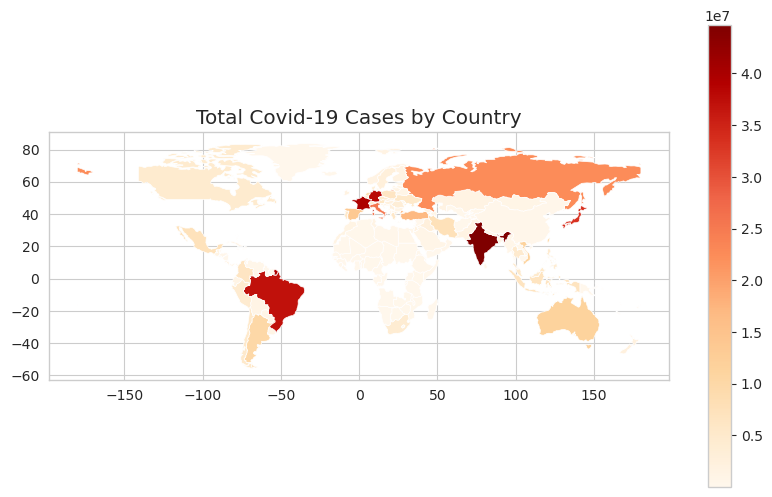

In [177]:
df = big_df.groupby('Country,Other').mean().reset_index()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the two datasets based on 'Country,Other' column
merged = world.merge(df, left_on='name', right_on='Country,Other')

# Plot the merged GeoDataFrame with TotalCases as the color
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='TotalCases', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Total Covid-19 Cases by Country')

plt.show()

We could see some country is highly on the number of people suffered Covid-19, such as:
- India.
- Japan.
- Some countries on North-West Europe.
- South America.

Take a glance at each continents about total cases.

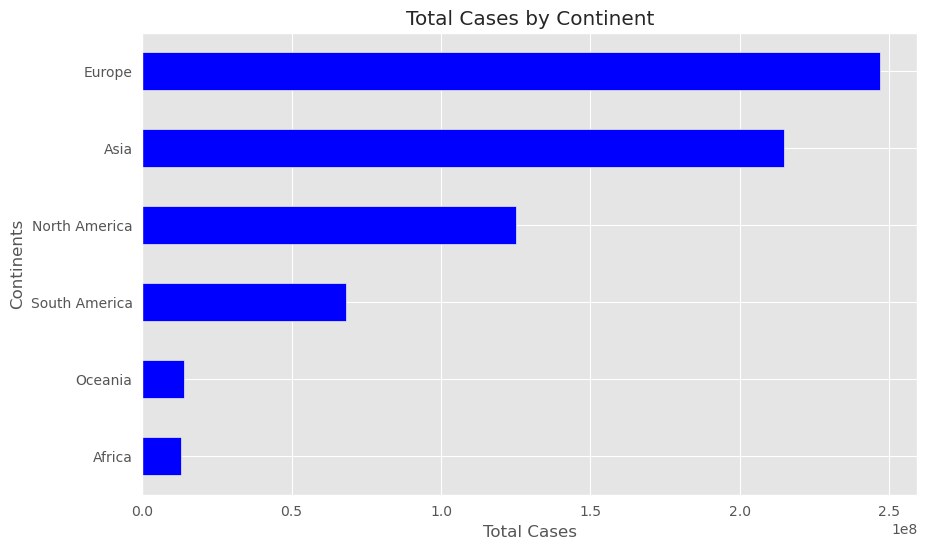

In [178]:
plt.style.use('ggplot')

#filtering the data by columns 'Country,Other', 'TotalCases', 'TotalDeaths', 'Date'
v_df = pan_df.loc[pan_df['Date'] == datetime(2023,3,15), ['Date','Country,Other', 'TotalDeaths', 'TotalCases']]
v_flter = v_df[v_df['Country,Other'].isin(continents)] #filtering the data by continents

m_cont = v_flter.sort_values(by = 'TotalCases',ascending=True)

#plotting the data
ax = m_cont.set_index('Country,Other')['TotalCases'].plot(kind='barh', figsize=(10,6), color='blue',title='Total Cases by Continent')
ax.set_xlabel("Total Cases")
ax.set_ylabel("Continents")

plt.show()

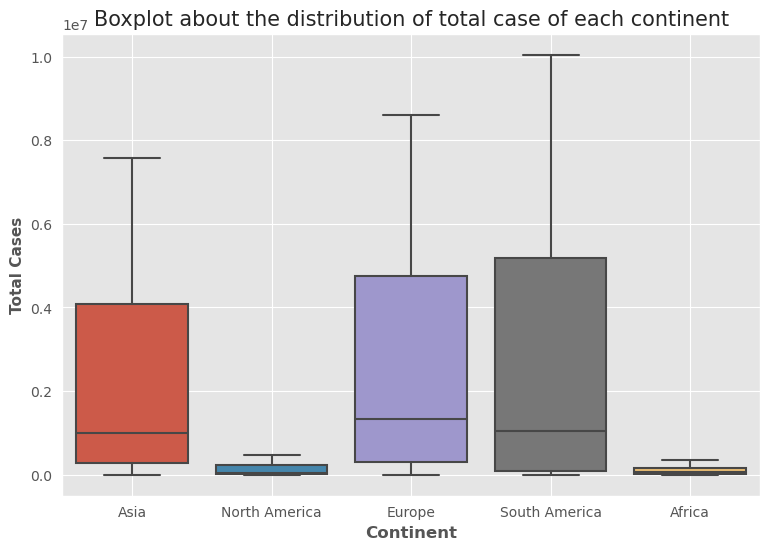

In [179]:
plt.figure(figsize=(9, 6))
copy_df = big_df[big_df['Continent'].isin(continents)]
sns.boxplot(data = copy_df, x='Continent', y='TotalCases', showfliers=False)
plt.xlabel('Continent', fontweight ='bold')
plt.ylabel('Total Cases', fontsize=11, fontweight ='bold')
plt.grid(True);
plt.title('Boxplot about the distribution of total case of each continent', fontsize=15);

We found that Europe gains the most cases in the world and the least cases belong to Africa. But how about number of cases lead to death? Let's try another relevant attribute, like `Total Deaths`.

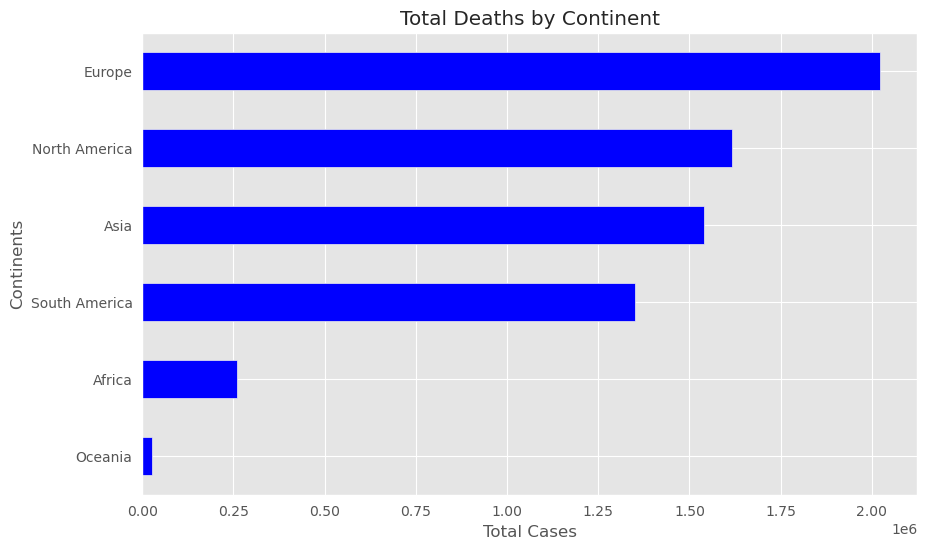

In [180]:
m_cont = v_flter.sort_values(by = 'TotalDeaths',ascending=True)

#plotting the data
ax = m_cont.set_index('Country,Other')['TotalDeaths'].plot(kind='barh', 
                                                           figsize=(10,6), color='blue',
                                                           title='Total Deaths by Continent')
ax.set_xlabel("Total Cases")
ax.set_ylabel("Continents")
plt.show()

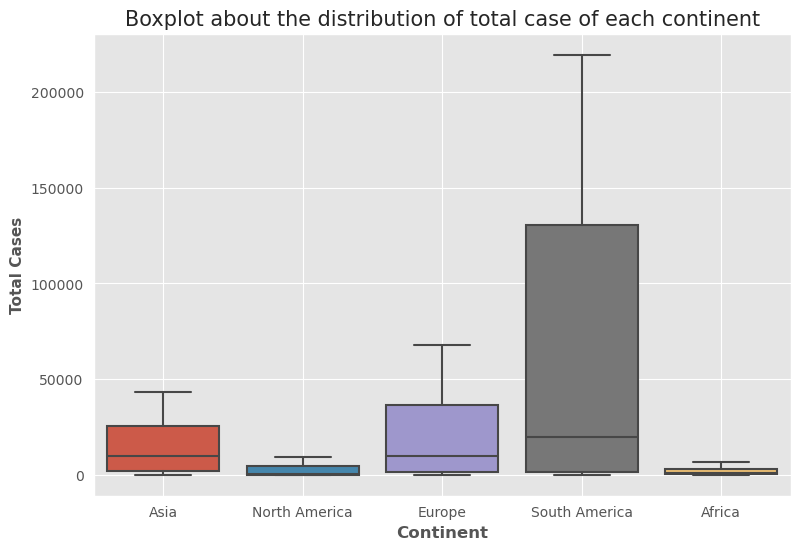

In [181]:
plt.figure(figsize=(9, 6))
copy_df = big_df[big_df['Continent'].isin(continents)]
sns.boxplot(data = copy_df, x='Continent', y='TotalDeaths', showfliers=False)
plt.xlabel('Continent', fontweight ='bold')
plt.ylabel('Total Cases', fontsize=11, fontweight ='bold')
plt.grid(True);
plt.title('Boxplot about the distribution of total death of each continent', fontsize=15);

Conclude that the order is not changed much if comparing to `Total Cases` attribute.
The most cases is still belong to Europe. The least case is belong to Oceania. It seems like Oceania has treated and prevented from Covid is quite active.

Moreover, is there any relationship between number of deaths and cases?

### Is there any relationship between `Total Deaths` and `Total Cases`?

/tmp/ipykernel_17952/1486222956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  m_cont = v_flter.groupby('Country,Other').mean()[['TotalDeaths', 'TotalCases']]


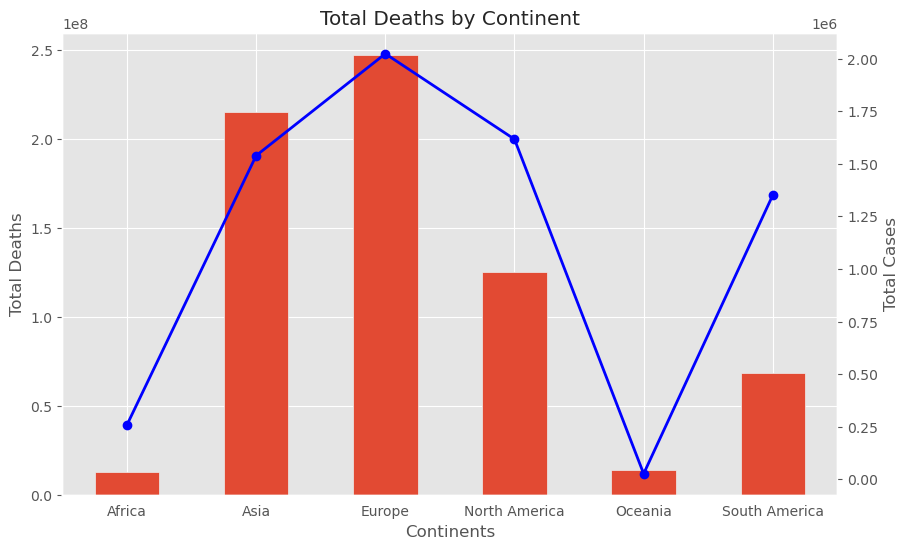

In [182]:
#Calculating mean of each continent
m_cont = v_flter.groupby('Country,Other').mean()[['TotalDeaths', 'TotalCases']]
m_cont
#plotting the data
ax = m_cont['TotalCases'].plot.bar(figsize=(10,6),title='Total Deaths by Continent')
ax1 = ax.twinx()
ax1.plot(m_cont['TotalDeaths'], color='blue', marker='o', linewidth=2.0)
ax1.grid(False)
ax.set_xlabel("Continents")
ax.set_ylabel("Total Deaths")
ax1.set_ylabel("Total Cases")
ax.tick_params(axis='x', rotation=0)
plt.show()

Indeed, where the number of infections increases, the number of deaths also increases.

<h3>How does the Covid pandemic spread out in recent days?</h3>

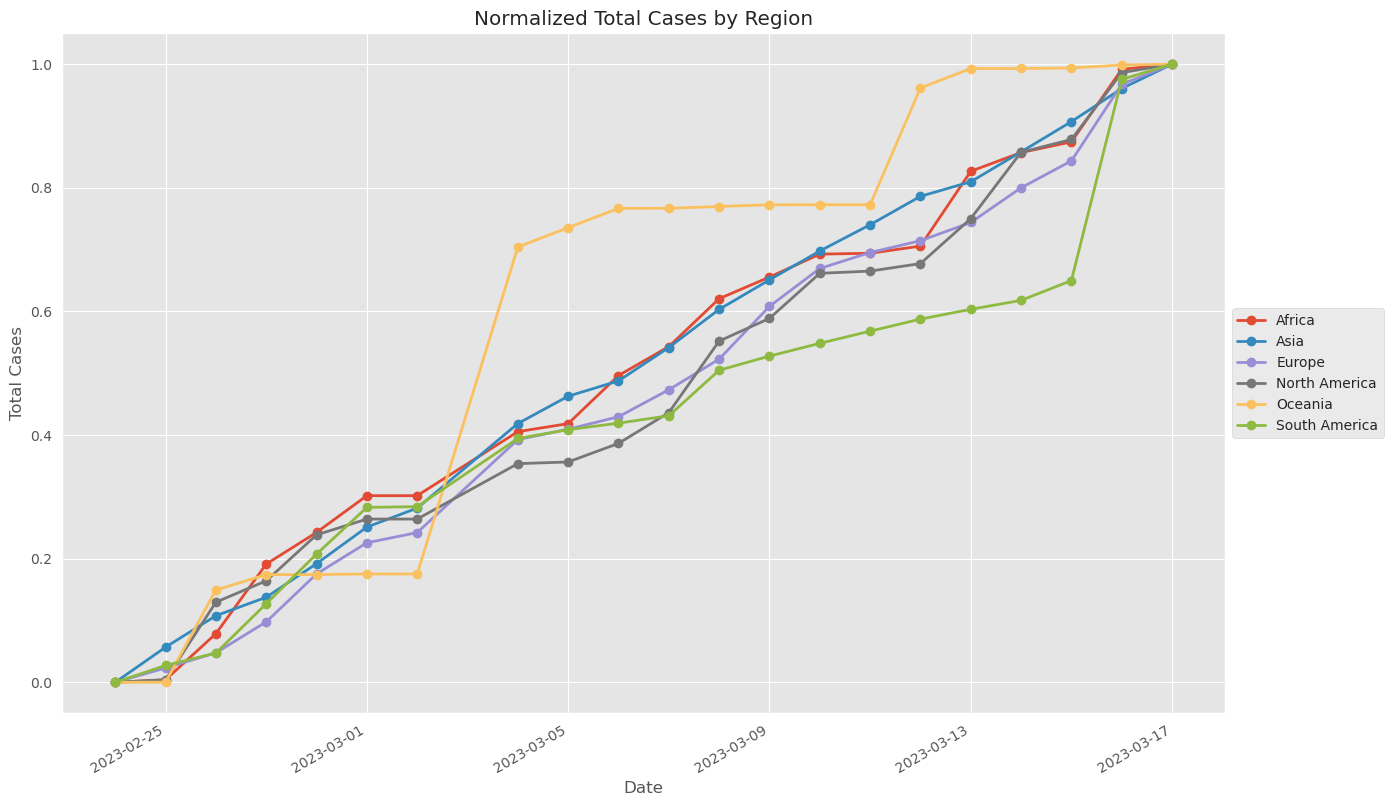

In [183]:
#filtering the data by columns 'Country,Other', 'TotalCases', 'TotalDeaths', 'Date'
v_df = pan_df[['Date','Country,Other', 'TotalDeaths', 'TotalCases']]
v_flter = v_df[v_df['Country,Other'].isin(continents)] #filtering the data by continents


# Scale the data to normalize.
v_pv = v_flter.pivot(index = 'Date', columns = 'Country,Other', values='TotalCases')

scaler = MinMaxScaler()
test_norm = pd.DataFrame(scaler.fit_transform(v_pv), 
                               columns=v_pv.columns, 
                               index=v_pv.index)

#Plotting the data
ax = test_norm.plot(kind = 'line', figsize = (15, 10),marker='o', linewidth=2.0,
                    title = 'Normalized Total Cases by Region')
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

On this chart, we take consideration on Oceania on 2023-03-03. This line cross through all the others.

But in general, the number of new cases of all regions are increasing. If we went back to 2020 or 2021, this problem would be really serious. How about 2023? We will find the answer soon.

### Find out the correlation between attributes.

If there are 2 arbitrary attributes have a correlation, does that mean it has the cause-effect relation?

/tmp/ipykernel_17952/2710121104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  big_corr= big_df.corr()


<Axes: >

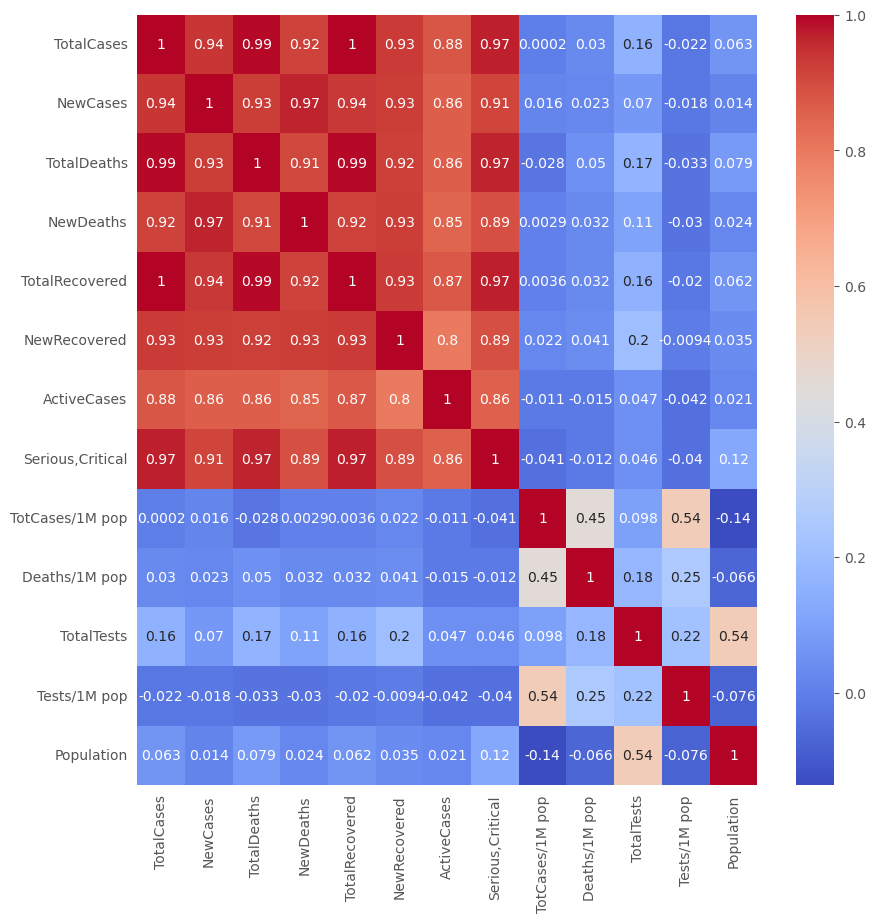

In [184]:
big_corr= big_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(big_corr, annot=True, cmap='coolwarm')

There are many attributes that are covariant, but which one has a cause-effect relationship?

We pay attention to the attributes which have a strong positive relationship ($corr \geq 0$) such as:
- `NewCases` and `NewDeaths`: Is the translation over yet? Relied on the ratio of deaths / number of cases.
- `NewCases` and `NewRecovered`: find out the situation of Covid up to now.
- `NewCases` and `ActiveCases`: we could find the Case Fatality Rate (CFR) to evaluate the effect off Covid.
- `ActiveCases`, `Serious,Critical` and `NewDeaths`: Number of deaths usually due to severe disease. So has the cure rate in severe cases improved? If not, why?
- `TotalCases` and `TotalDeaths`: as above.
- ...

### Is the pandemic situation positive?

Relying on the correlation between `NewCases` and `NewRecovered`.

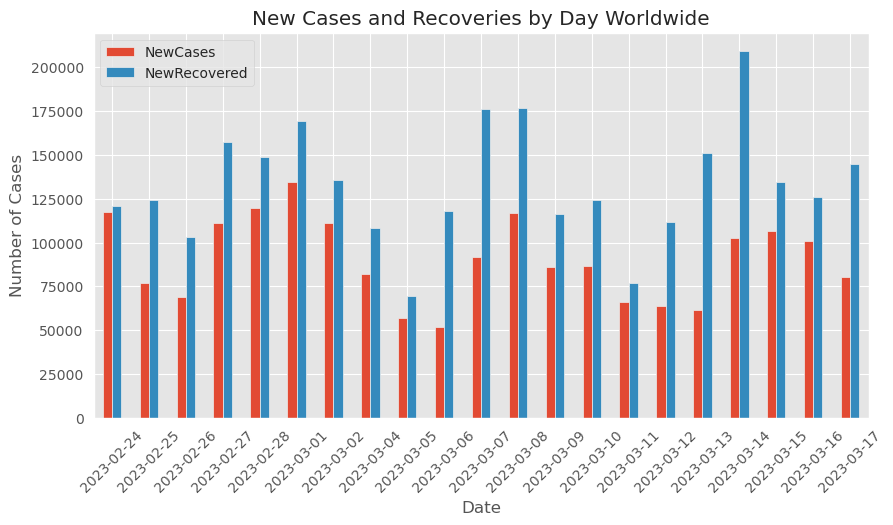

In [185]:
new_df = pan_df.loc[pan_df['Country,Other'].isin(continents), ['NewCases','NewRecovered','Date']]

#Filtering some columns and rows
new_w_df = pan_df.loc[pan_df['Country,Other'] == 'World', ['NewCases','NewRecovered','Date']]
new_w_df = new_w_df.set_index('Date').sort_index()
new_w_df.index = new_w_df.index.date

ax = new_w_df.plot(kind='bar',figsize=(10,5), title = 'New Cases and Recoveries by Day Worldwide')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45);

On all days, the number of new recovered cases is greater than new suffered cases. It implices that the pandamic has a positive report. 

Specially, on the day 2023-03-14, the number of recovered case take approximately 2-fold times of the number of new case.

### The degree of spread.

Based on `NewCases` and `Population`. 


\begin{equation}
    SR(\%)=\frac{NewCases * 100}{Population}
\end{equation}

In [186]:
%%capture
big_copy = big_df.copy()
#Calculating SR
sr = big_copy[['Country,Other','TotalCases','Population','NewCases','Date']]
sr['Spread Ratio'] = sr['NewCases']*100/sr['Population']
#drop error outliers
idx = ['World','']
sr_dr = sr.drop(sr[sr['Country,Other'].isin(idx)].index)

country = sr_dr.groupby('Country,Other').mean()['Spread Ratio']
country = country.sort_values(ascending=False)



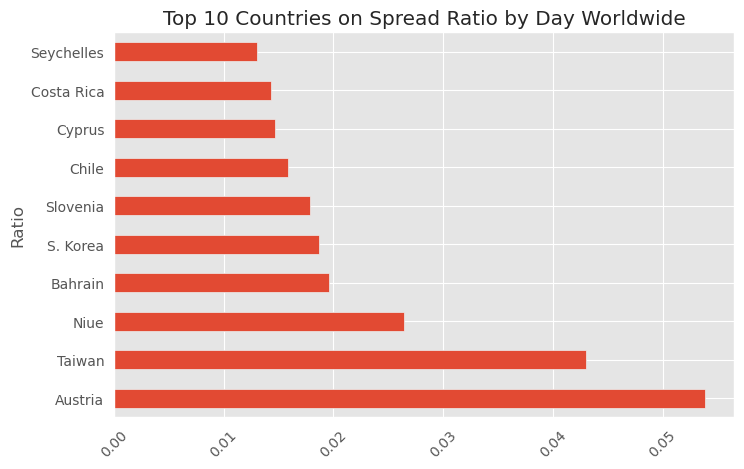

In [187]:
country.head(10).plot.barh(x='Date', y = 'Spread Ratio', figsize=(8,5),
                title = 'Top 10 Countries on Spread Ratio by Day Worldwide')
plt.ylabel('Ratio')
plt.xticks(rotation=45);

Why our team use this rate? Because it showed off clearly and directly the spread speed of Covid-19.

Spread Rate are currently below <font color='red'>1%</font> $\Rightarrow$ the spread of Covid is not fast anymore. Indirectly, We could know Covid pandemic has been controlled completely. Because of vaccine coverage and number of people suffered Covid. Check the next evidence.

In [188]:
%%capture
time = sr_dr.groupby('Date').mean()['Spread Ratio']


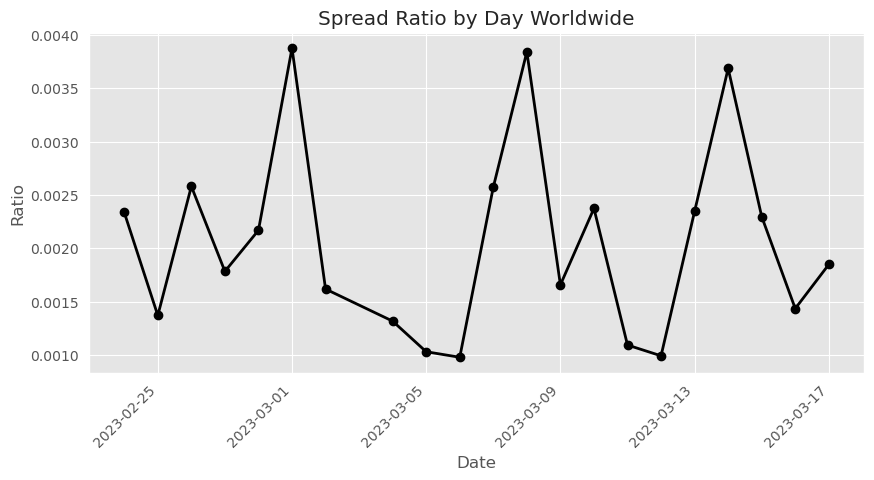

In [189]:
time.plot(kind='line', figsize=(10,5), marker='o', linewidth=2., color='black', title = 'Spread Ratio by Day Worldwide')
plt.ylabel('Ratio')
plt.xticks(rotation=45);


Day by day, the spread ratio is decreasing gradually and remaining stably under $0.04%$.

Conclusion, we can make sure that the fear of people to Covid pandemic is over.

### Relationship among `ActiveCases`, `Serious,Critical` and `NewDeaths`.

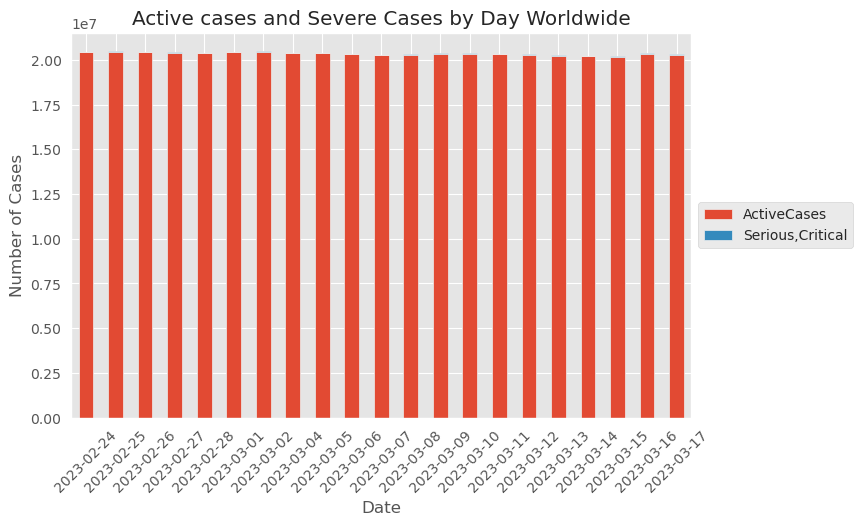

In [190]:
world = pan_df.loc[pan_df['Country,Other'] == 'World',
                    ['ActiveCases','NewDeaths','Serious,Critical','Date']]

world = world.set_index('Date')
world.index = world.index.date
ax = world.sort_index(ascending=True).plot.bar(y = ['ActiveCases','Serious,Critical'], figsize=(8,5),
                              stacked=True,
                    title = 'Active cases and Severe Cases by Day Worldwide')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.tick_params(axis='x', labelrotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Based on the chart, we can see the number of cases is quite large, but the number of cases that get worse is almost invisible on the chart. This shows that the treatment regimen to prevent the disease of Covid is very well-controlled.

Let's take a look at `NewDeaths`

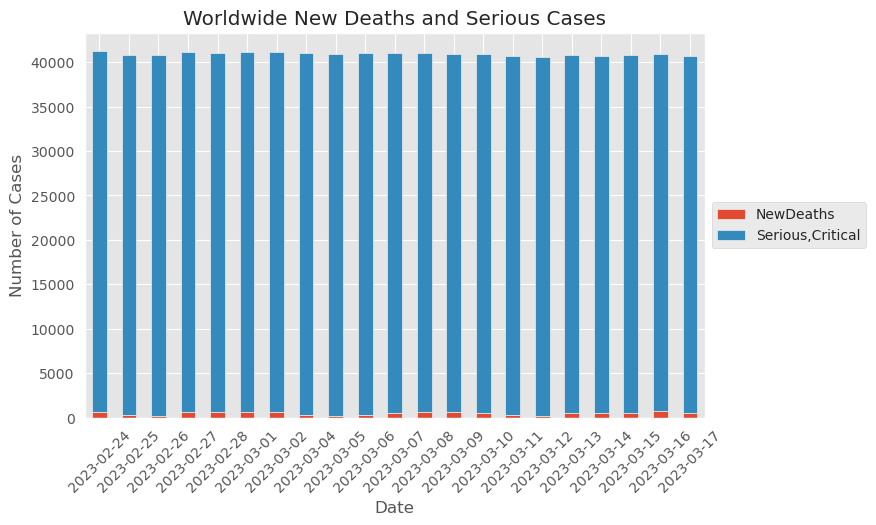

In [191]:
world = pan_df.loc[pan_df['Country,Other'] == 'World',
                    ['NewDeaths','Serious,Critical','Date']]
world = world.set_index('Date')
world.index = world.index.date
ax = world.sort_index(ascending=True).plot.bar( figsize=(8,5), stacked=True,
                                    title='Worldwide New Deaths and Serious Cases')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.tick_params(axis='x', labelrotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Similarly, the number of severe cases leading to death is well-controlled. 

Because there is an effective treatment regimen for covid. Even if the disease progresses seriously, there is no need to worry anymore. More generally, we consider their proportions.

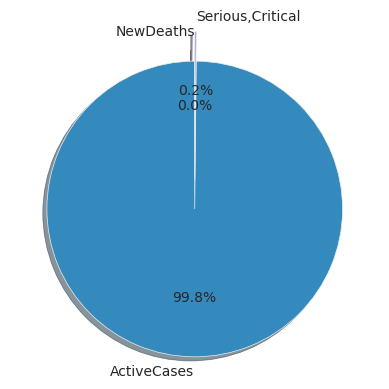

In [192]:
fig = plt.figure()
ax = fig.add_subplot()
test = pan_df.describe().loc['mean',['NewDeaths','ActiveCases','Serious,Critical']]
explode = (0, .1, .1)
ax.pie(test.values, labels=test.index, explode = explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

### Case Fatality Rate

Relationship between `NewDeaths` and `ActiveCases`.

\begin{equation}
    CFR = \frac{NewDeaths*100}{ActiveCases}
\end{equation}

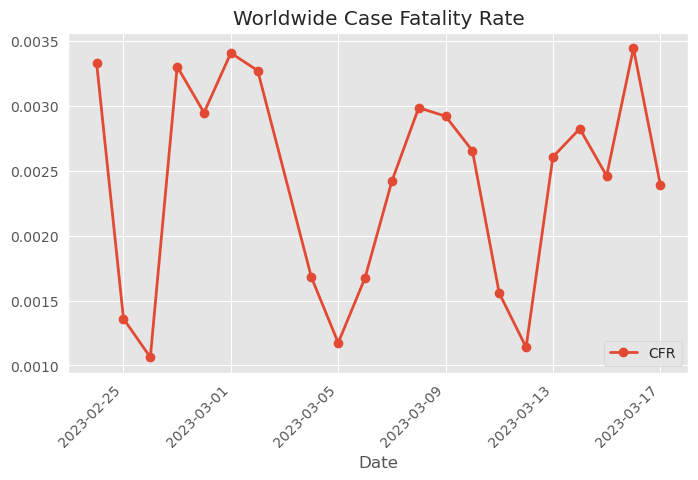

In [193]:
world = pan_df.loc[pan_df['Country,Other'] == 'World',
                    ['ActiveCases','NewDeaths','Serious,Critical','Date']]

world['CFR'] = world['NewDeaths']*100/world['ActiveCases']
world.plot.line(x='Date', y = 'CFR', figsize=(8,5),marker='o', linewidth=2.0,
                title = 'Worldwide Case Fatality Rate')
ax.set_xlabel('Date')
ax.set_ylabel('CFR')
plt.xticks(rotation=45);

The case fatality rate is very low ($CFR<0.05\%$) and tending to be stable, so the disease caused by Covid is no longer serious.

### Relationship among `TotalDeaths`, `TotalCases` and `TotalRecovered`.

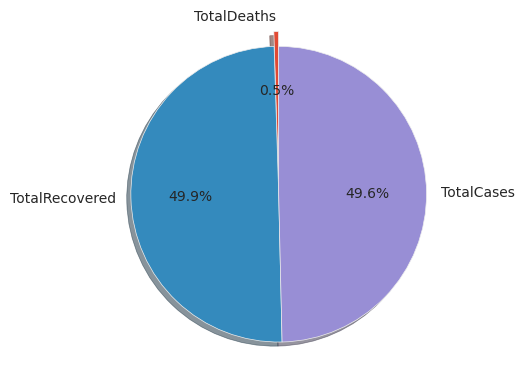

In [194]:
fig = plt.figure()
ax = fig.add_subplot()
test = big_df.describe().loc['mean',['TotalDeaths','TotalRecovered','TotalCases']]
explode = (0.1, 0, 0)
ax.pie(test.values, labels=test.index, autopct='%1.1f%%', explode= explode, shadow=True, startangle=90)
plt.show()

#### Relationship between `TotalCases` and `TotalRecovered`

In [195]:
big_bias = continents
big_bias.extend(['World',''])
total_df = big_df.drop(index=big_df[big_df['Country,Other'].isin(big_bias)].index)

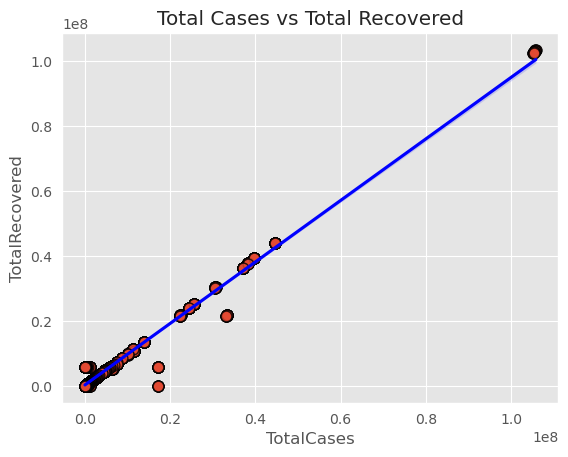

In [196]:
sns.regplot(x=total_df.TotalCases, y = total_df.TotalRecovered,
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Cases vs Total Recovered');

We can not see clearly trend because of data clustering in origin &rarr; We should de-cluster data points

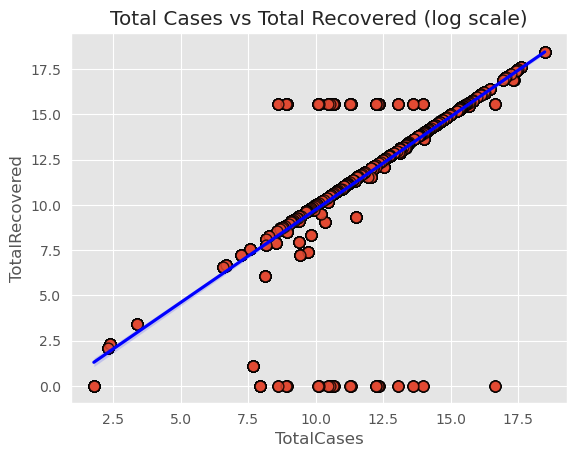

In [197]:
sns.regplot(x=np.log1p(total_df.TotalCases), y = np.log1p(total_df.TotalRecovered),
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Cases vs Total Recovered (log scale)');

#### Relationship between `TotalCases` and `TotalDeaths`

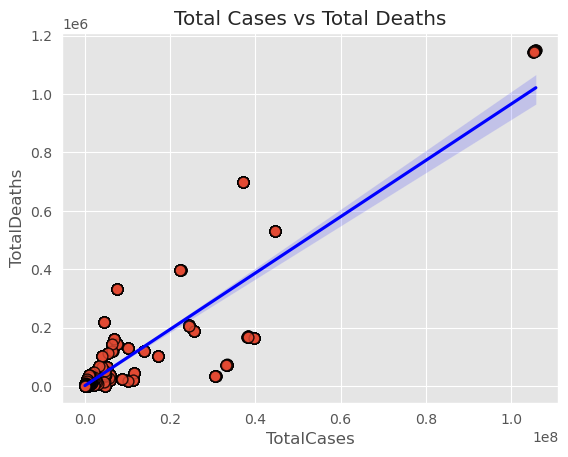

In [198]:
sns.regplot(x=total_df.TotalCases, y =total_df.TotalDeaths,
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Cases vs Total Deaths');

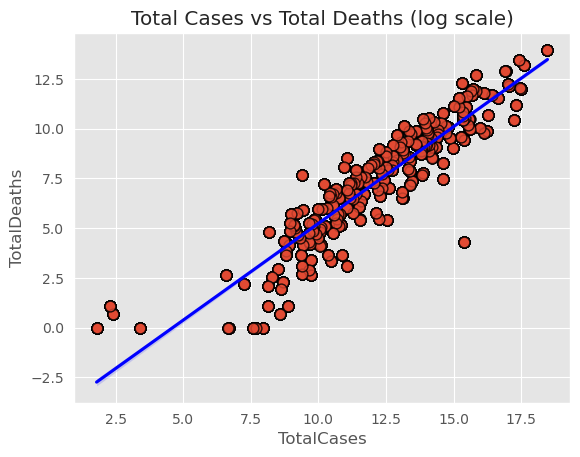

In [199]:
sns.regplot(x=np.log1p(total_df.TotalCases), y = np.log1p(total_df.TotalDeaths),
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Cases vs Total Deaths (log scale)');

#### Relationship between `TotalDeaths` and `TotalRecovered`

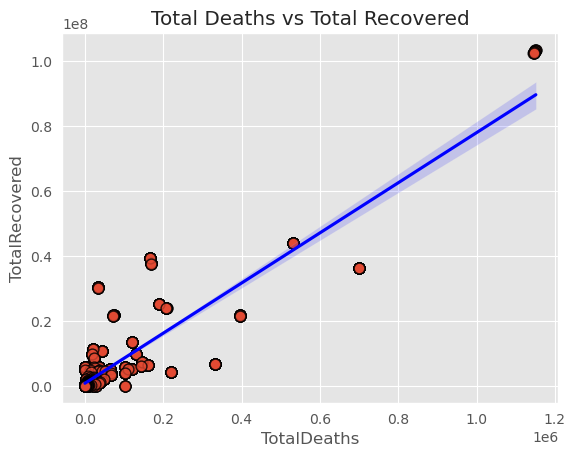

In [200]:
sns.regplot(x=total_df.TotalDeaths, y =total_df.TotalRecovered,
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Deaths vs Total Recovered');

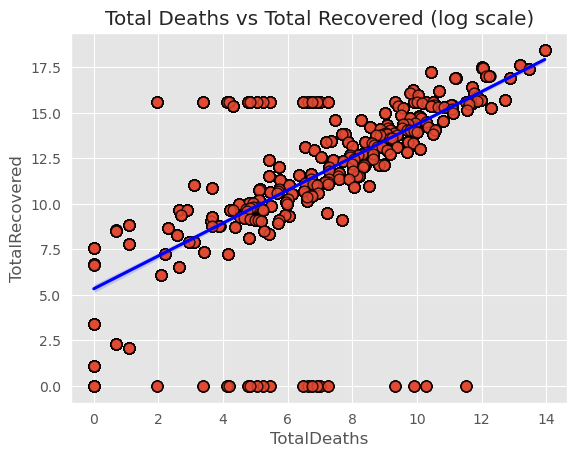

In [201]:
sns.regplot(x=np.log1p(total_df.TotalDeaths), y = np.log1p(total_df.TotalRecovered),
            scatter_kws={'s':60, 'edgecolor':'k'}, 
            line_kws={'color': 'blue'})
plt.title('Total Deaths vs Total Recovered (log scale)');

&rarr; Conclusion:
- Normally, we can easily know `TotalCases` linear with `TotalDeaths` and `TotalRecovered`
- There is, however, a linear relationships `TotalDealths` and `TotalRecoveries`. It could be both of them linear with `TotalCase` so they are related to each other.
- Despite linear relationships between above 3 attributes, there still some outlier points which don't follow regression line but it is not significant.

## How is the medical capacity of countries in epidemics?

When talking about medical ability in a pandemic, we focus on 2 aspect:
- Abitlity to prevent disease
- Ability to heal

### Ability to prevent disease:

In [202]:
big_df['Test/Case'] = big_df['TotalTests'] / big_df['TotalCases']

First of all, we look attempt to detect disease by each continent

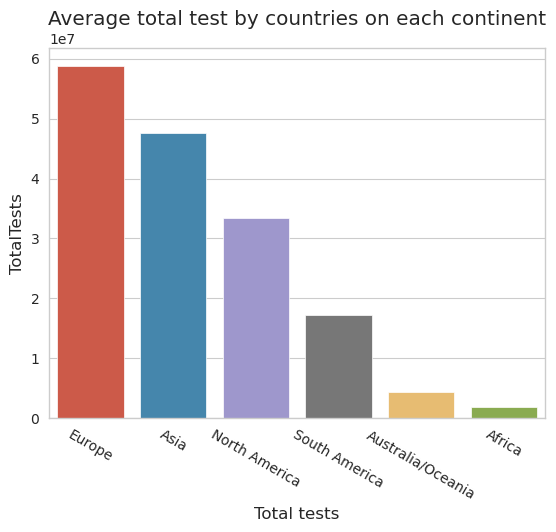

In [203]:
visual_df = big_df.groupby('Continent', as_index=False)['TotalTests'].mean().sort_values(by='TotalTests', ascending=False).iloc[:-1]

sns.set_style('whitegrid')
sns.barplot(data=visual_df, x='Continent', y='TotalTests')

plt.xlabel("Total tests")
plt.xticks(rotation=-30)
plt.title('Average total test by countries on each continent')
plt.show()

Observations:
- European countries are the most attempt in conducting tests to detect pathogens.
- Following that are Asia, North America, South America, Australia/Oceania and Africa respectively.

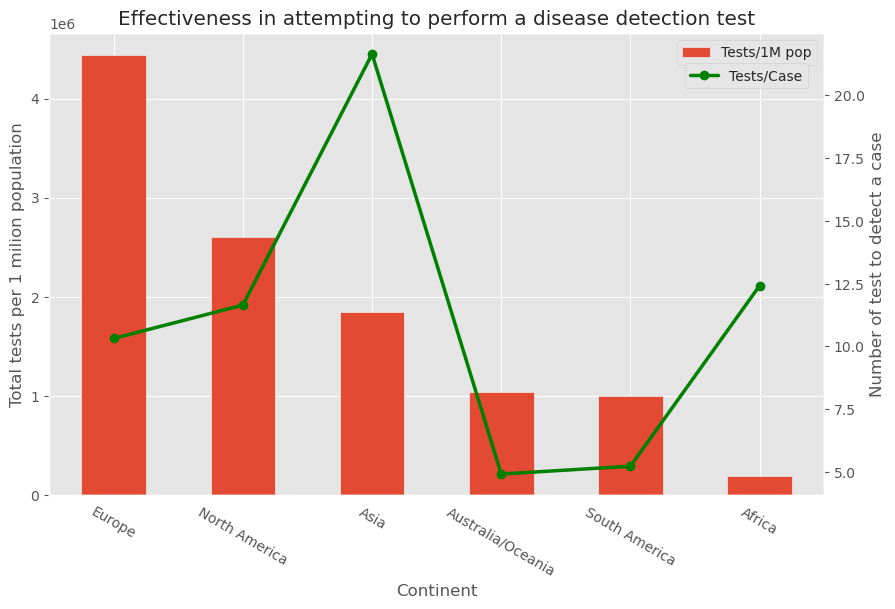

In [204]:
# calculate features for plotting
visual_df = big_df.loc[big_df.Continent != 'All'].groupby('Continent')[['Tests/1M pop', 'Test/Case']].mean().sort_values(by='Tests/1M pop', ascending=False)

# plotting
plt.style.use('ggplot')
ax0 = visual_df[['Tests/1M pop']].plot.bar(figsize=(10, 6), title='Effectiveness in attempting to perform a disease detection test', label='Tests/1M pop')

ax1 = ax0.twinx()
ax1.plot(visual_df[['Test/Case']], color='green', marker='o', linewidth=2.5, label='Tests/Case')

ax1.grid(False)
ax0.set_xlabel('Continent')
ax0.set_ylabel('Total tests per 1 milion population')
ax1.set_ylabel('Number of test to detect a case')
ax0.set_xticklabels(labels=visual_df.index, rotation=-30)
plt.legend(loc=(0.82, 0.88))
plt.show()

Moreover, the rate of infection is one of the best parameters to show prevent disease ability.

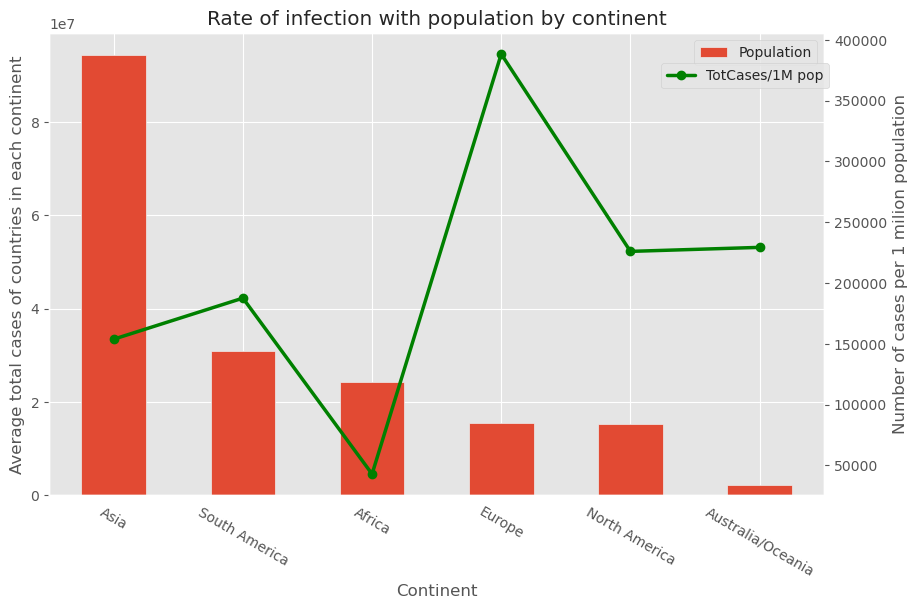

In [205]:
visual_df = big_df.loc[big_df.Continent != 'All'].groupby('Continent')[['Population', 'TotCases/1M pop']].mean().sort_values(by='Population', ascending=False)

# plotting
ax0 = visual_df[['Population']].plot.bar(figsize=(10, 6), title='Rate of infection with population by continent', label='Population')

ax1 = ax0.twinx()
ax1.plot(visual_df[['TotCases/1M pop']], color='green', marker='o', linewidth=2.5, label='TotCases/1M pop')

ax1.grid(False)
ax0.set_xlabel('Continent')
ax0.set_ylabel('Average total cases of countries in each continent')
ax1.set_ylabel('Number of cases per 1 milion population')
ax0.set_xticklabels(labels=visual_df.index, rotation=-30)
plt.legend(loc=(0.79, 0.88))
plt.show()

From above 2 plots, we have somes conclusions:
- With Europe:
    - Be the most attempt contient in conducting test and have a good effectiveness when standing 3th in number of tests to detect a case.
    - However, it has the highest rate of infection which means that the effectiveness in the test is because epidemics are rampant in their continents. It's not really effective!
    **&rarr; We can say that Europe is the worst continent in preventing pademic**

- With Asia:
    - They conducts less tests than Europe and even North America. Additionally, number of tests to detect a case is the highest, so is Asia bad in preventing pandemic?
    - Asia, however, has bad parameter in testing when comparing with other Europe or North America. And yet, it has good infection rate which next to the best rates, and it's more amazing when their population is the most.
    **&rarr; Asia is the best preventing pandemic continent**

- With others continent: there's not too much special with the others cases
    - Africa has the lowest infection rate, which is unexpected that a medicine not so advanced as Africa.
    - Australia has the 2nd highest infection rate, which is worse when its population is the least.
    - With both of South America and North America, their preventing ability are also not good when have approximated infection rates and stand next to each others.

### Ability to heal

There are 2 kind of measurements that show healing capacity is ***rate of recovered*** and ***number of recovered***

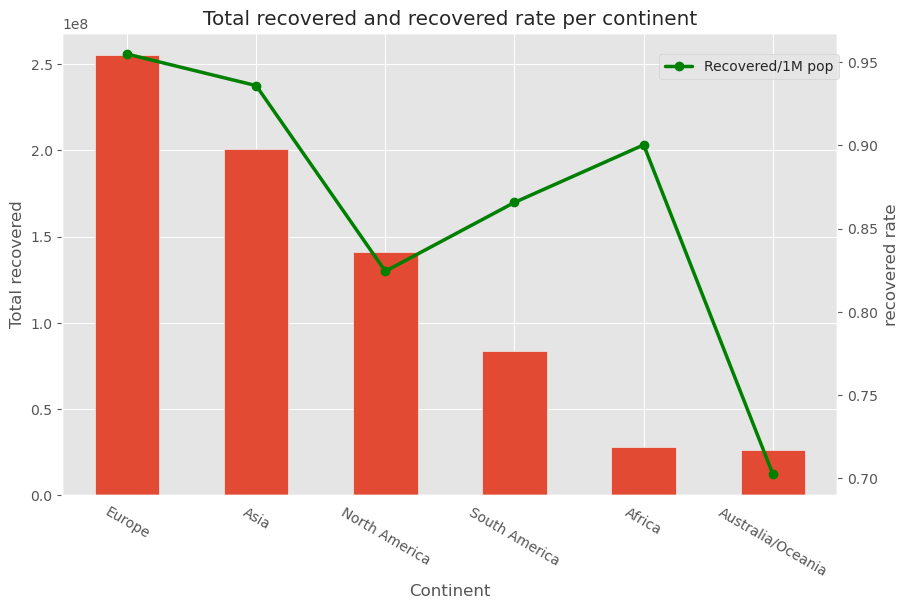

In [206]:
visual_df = pd.pivot_table(data=big_df.loc[big_df.Continent != 'All'], index='Continent', columns='Country,Other', \
                            values=['TotalRecovered'], aggfunc='mean').fillna(0).sum(axis=1).sort_values(ascending=False)

ax0 = visual_df.plot.bar(figsize=(10, 6), title='Total recovered and recovered rate per continent')
ax0.set_xticklabels(labels=visual_df.index, rotation=-30)

big_df['recovered_rate'] = big_df.TotalRecovered / big_df.TotalCases
visual_df_non_sort = big_df.loc[(big_df.recovered_rate <= 1) & (big_df.Continent != 'All')].groupby('Continent')[['recovered_rate']].mean()
visual_df = visual_df_non_sort.loc[visual_df.index]

ax1 = ax0.twinx()
ax1.plot(visual_df.recovered_rate, color='green', marker='o', linewidth=2.5, label='Recovered/1M pop')

ax1.grid(False)
ax0.set_xlabel('Continent')
ax0.set_ylabel('Total recovered')
ax1.set_ylabel('recovered rate')
plt.legend(loc=(0.77, 0.9))
plt.show()

**Conclusion:**
- Despite not good at preventing pandemic, Europe countries are good at healing which is proved from above plot when have the most recovered cases beside the highest recovered rates over 95%.
- Following after that is Asia which stands 2nd in both of total recovered cases and recovered rates.
- Surprisingly, Africa stand in 3rd places in recovered rate, higher than North/South America which have more advanced medicine and science.
- And the worst contient in healing is Australia which have recovered rates approximates 70%
- Generally, continents all have not bad recovered rates with the least is 70%

## Are there any relationship between `TotalCases` and `NewCases`; `TotalDeaths` and `NewDeaths`; `TotalRecovered` and `NewRecovered`?

### Eploring relationship

Text(0.5, 1.0, 'Relationship between new recovered & total recovered')

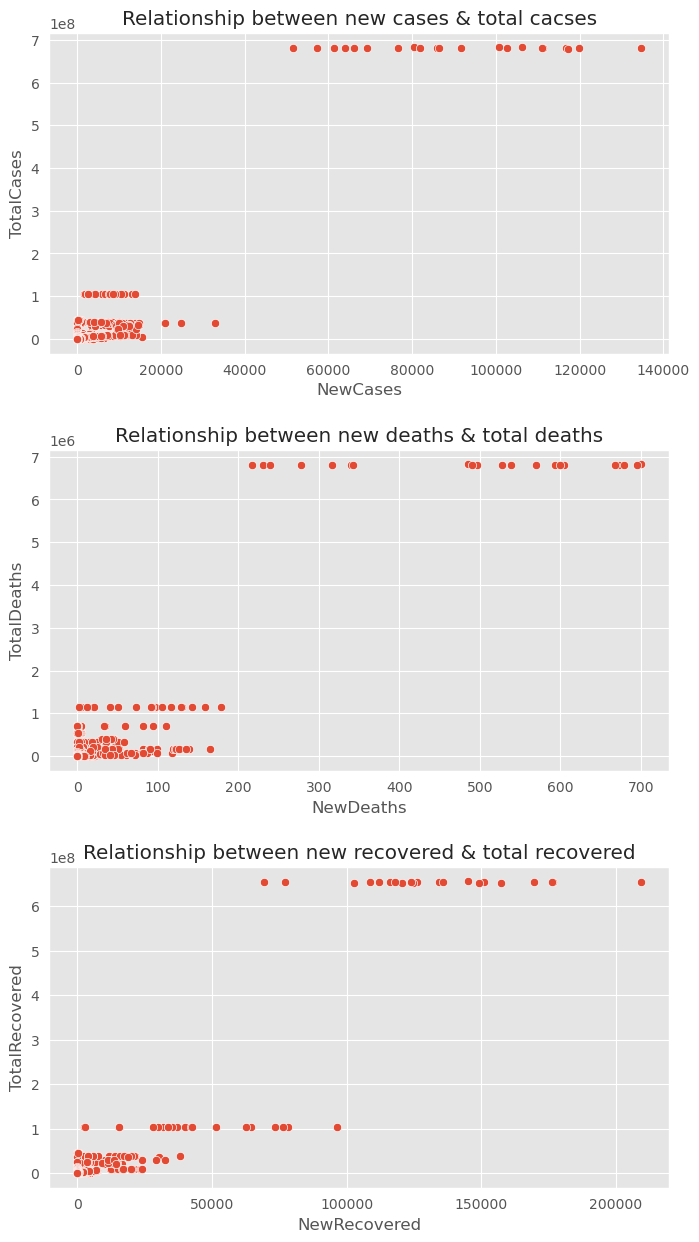

In [207]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

sns.scatterplot(data=big_df, x='NewCases', y='TotalCases', ax=axes[0])
axes[0].set_title("Relationship between new cases & total cacses")

sns.scatterplot(data=big_df, x='NewDeaths', y='TotalDeaths', ax=axes[1])
axes[1].set_title("Relationship between new deaths & total deaths")

sns.scatterplot(data=big_df, x='NewRecovered', y='TotalRecovered')
axes[2].set_title("Relationship between new recovered & total recovered")

We can see that most of points (in three plots) concentrated in bottom left and severals in the top. Therefore, we do some transformation, typically is ***log transformation***.

**Note:** we will use `np.log1p`, which will add 1 to avoid log(0)

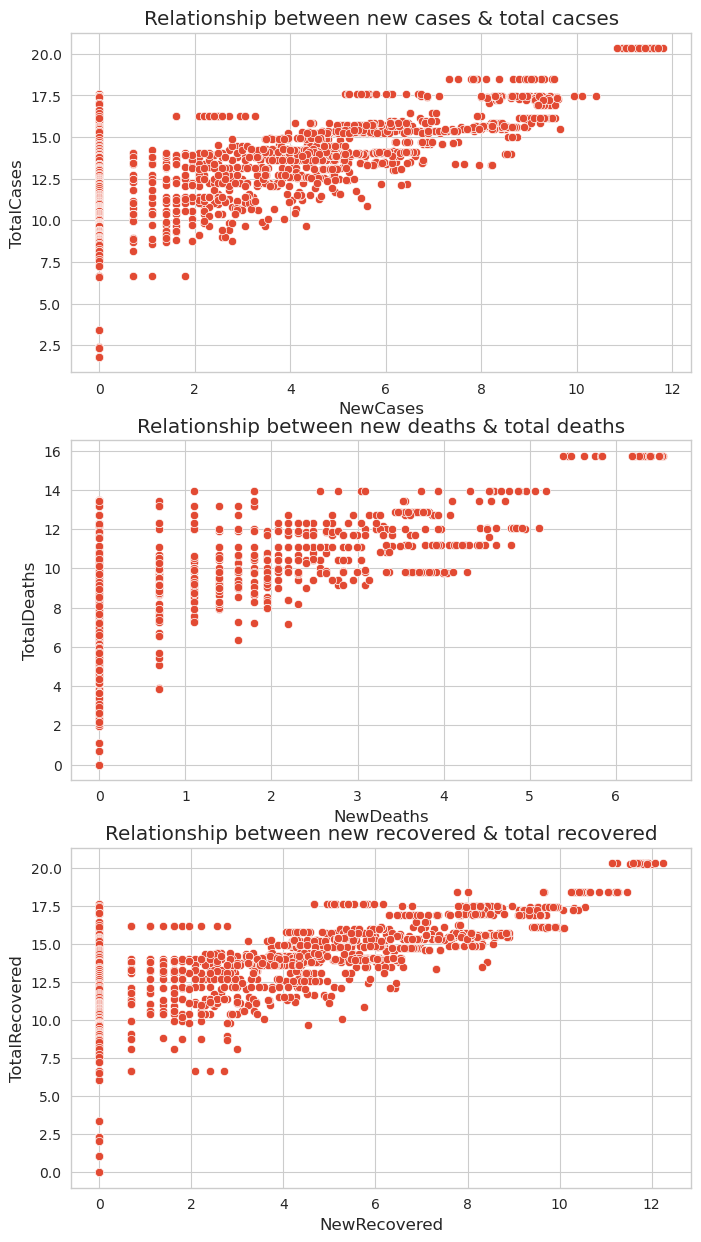

In [208]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
sns.scatterplot(x=np.log1p(big_df['NewCases']), y=np.log1p(big_df['TotalCases']), ax=axes[0])
axes[0].set_title("Relationship between new cases & total cacses")

sns.scatterplot(x=np.log1p(big_df.NewDeaths), y=np.log1p(big_df.TotalDeaths), ax=axes[1])
axes[1].set_title("Relationship between new deaths & total deaths")

sns.scatterplot(x=np.log1p(big_df.NewRecovered), y=np.log1p(big_df.TotalRecovered), ax=axes[2])
axes[2].set_title("Relationship between new recovered & total recovered")

plt.show()

From these plots, we can relize there is a linear relationship between them. Now, we will plot a linear regression line to check it.

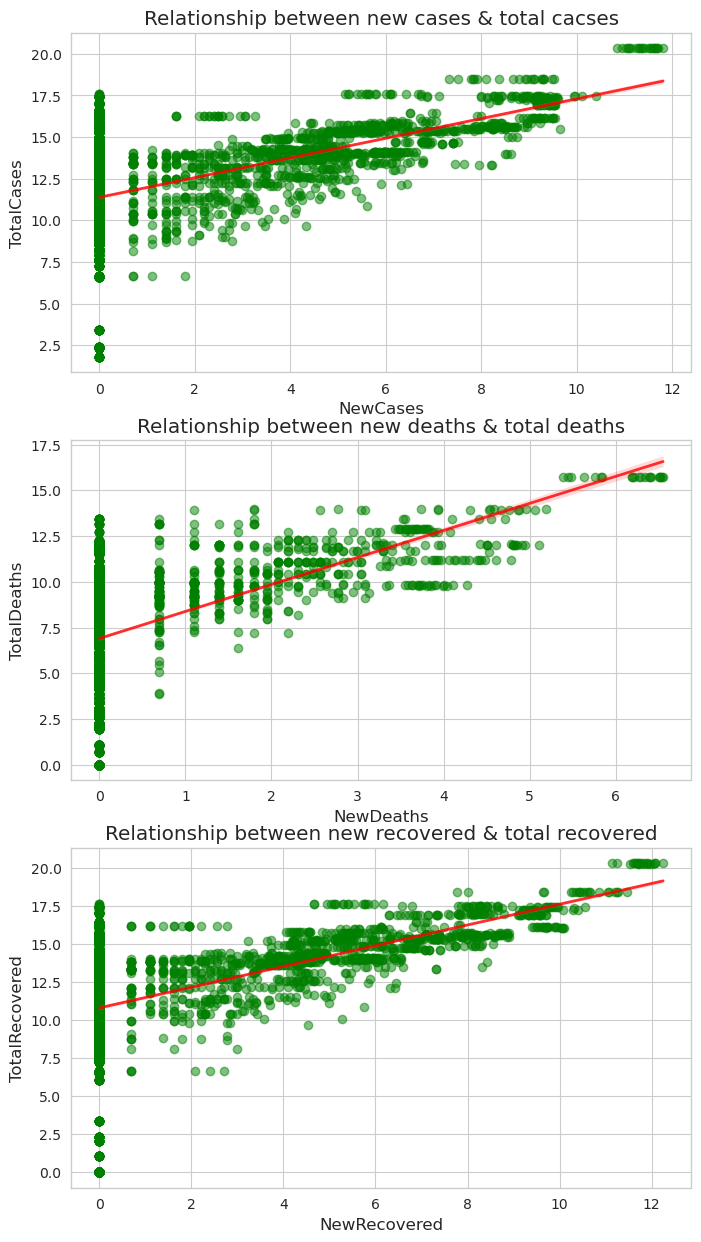

In [209]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

sns.set_style('whitegrid') 
sns.regplot(x=np.log1p(big_df['NewCases']), y=np.log1p(big_df['TotalCases'],), ax=axes[0], 
            scatter_kws={'color':'green', "alpha": 0.5},
            line_kws={"color": "red", "alpha": 0.8, "lw": 2})
axes[0].set_title("Relationship between new cases & total cacses")

sns.regplot(x=np.log1p(big_df.NewDeaths), y=np.log1p(big_df.TotalDeaths), ax=axes[1],
            scatter_kws={'color':'green', "alpha": 0.5},
            line_kws={"color": "red", "alpha": 0.8, "lw": 2})
axes[1].set_title("Relationship between new deaths & total deaths")

sns.regplot(x=np.log1p(big_df.NewRecovered), y=np.log1p(big_df.TotalRecovered), ax=axes[2],
            scatter_kws={'color':'green', "alpha": 0.5},
            line_kws={"color": "red", "alpha": 0.8, "lw": 2})
axes[2].set_title("Relationship between new recovered & total recovered")

plt.show()

**Conclusion:**
- There are linear relationship between `TotalCases` and `NewCases`; `TotalDeaths` and `NewDeaths`; `TotalRecoverd` and `NewRecovered`, which in exactly way is linear between logarithm of them.
- Maybe there relationship between original number of above pair but they clustered too much. Therefore, we have to use logarithm to de-cluster them.
- All of 3 relationship are slightly linear when their slope is not large.
- There are a vertical line of point at 0 values in all of 3 plots, whichs are zero `NewCases`, `NewDeaths` and `NewRecovered` cases 

### Relationship of each continent

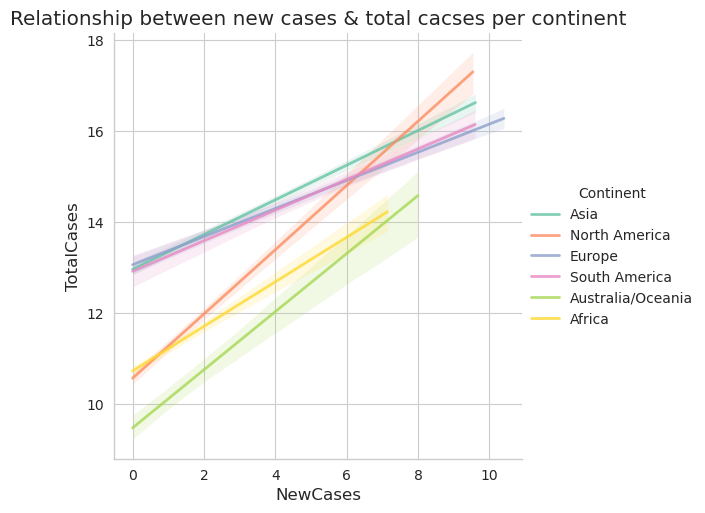

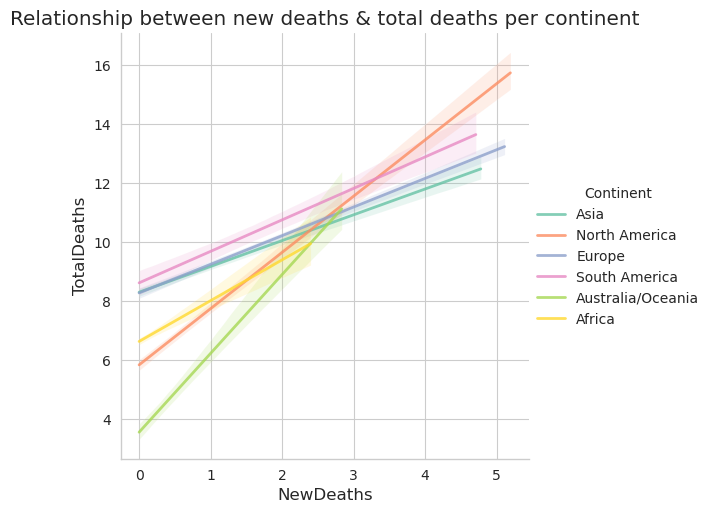

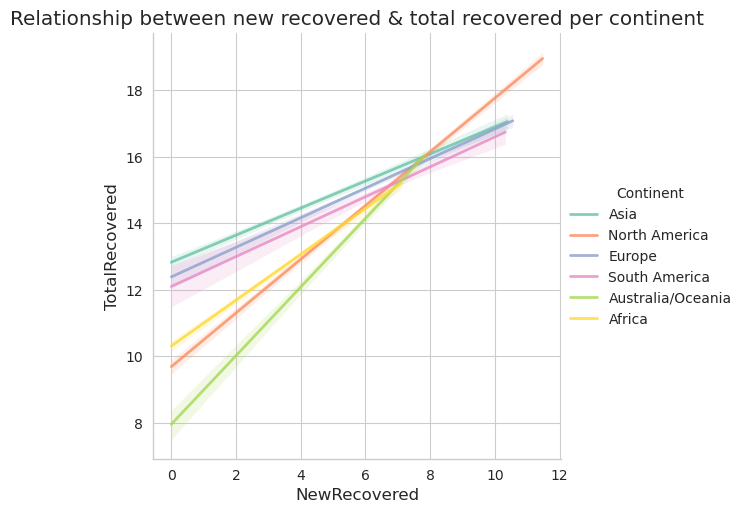

In [210]:
visual_df = big_df.loc[:, ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'Continent']]
visual_df = visual_df.loc[visual_df.Continent != 'All']
for feature in visual_df.columns.to_list()[:-1]:
    visual_df[feature] = np.log1p(visual_df[feature])

sns.set_style('whitegrid') 
sns.lmplot(data=visual_df, x='NewCases', y='TotalCases', scatter=False,
            hue='Continent', palette='Set2',
            line_kws={"alpha": 0.8, "lw": 2})
plt.title("Relationship between new cases & total cacses per continent")

sns.lmplot(data=visual_df, x='NewDeaths', y='TotalDeaths', scatter=False,
            hue='Continent', palette='Set2',
            line_kws={"alpha": 0.8, "lw": 2})
plt.title("Relationship between new deaths & total deaths per continent")

sns.lmplot(data=visual_df, x='NewRecovered', y='TotalRecovered', scatter=False,
            hue='Continent', palette='Set2',
            line_kws={"alpha": 0.8, "lw": 2})
plt.title("Relationship between new recovered & total recovered per continent")

plt.show()

From above plots, we can conclude:
- Most of continents have likely regression line, except **North America**.
- ***North America*** have stronger line when have a larger slope line. Therefore, we can say that ***North America*** increase stronger than the others

## Is it true that The larger `population` is, the more infection cases are?

In the other hands, the more a population, the more people are infected. Thus, we should check it.


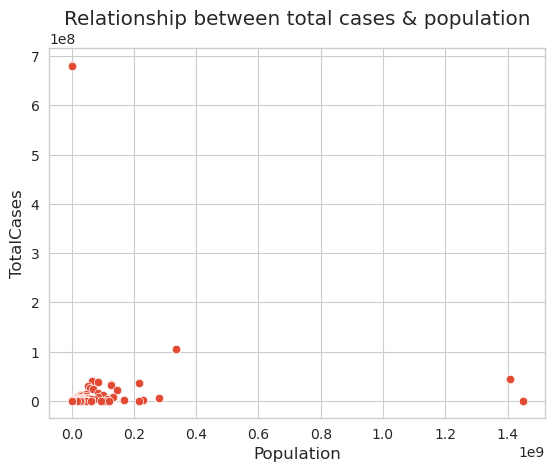

In [211]:
sns.scatterplot(data=big_df, x='Population', y='TotalCases')
plt.title("Relationship between total cases & population")
plt.show()

we also meet it again!

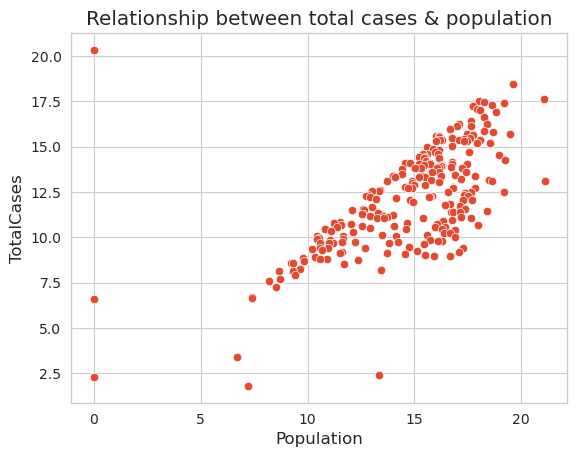

In [212]:
sns.scatterplot(x=np.log1p(big_df.Population) , y=np.log1p(big_df.TotalCases))
plt.title("Relationship between total cases & population")
plt.show()

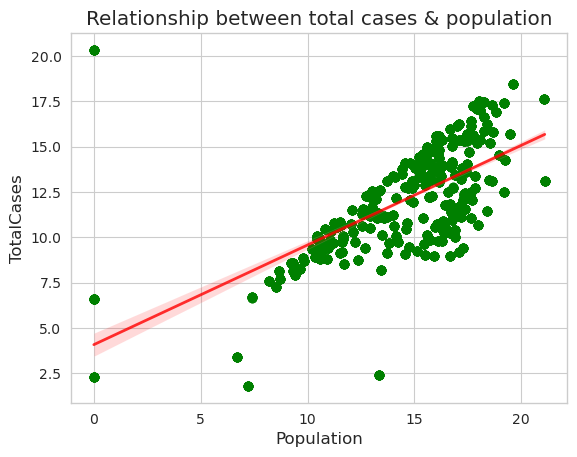

In [213]:
sns.regplot(x=np.log1p(big_df.Population), y=np.log1p(big_df.TotalCases),
            scatter_kws={'color':'green', "alpha": 0.5},
            line_kws={"color": "red", "alpha": 0.8, "lw": 2})
plt.title("Relationship between total cases & population")
plt.show()

Since above plot, we can prove our suspect that there is a linear relationship between `Population` and `TotalCases`.

## Cause - effect relation

### Will `NewCases` increse when `NewDeaths` or `NewRecovered` increase?

#### `NewCases` vs `NewDeaths`

In [214]:
# we will drop 0 cells because its meanless and we will have trouble when transforming data
visual_df = big_df.loc[(big_df.NewCases != 0) & (big_df.NewDeaths != 0) & (big_df.NewRecovered != 0)]

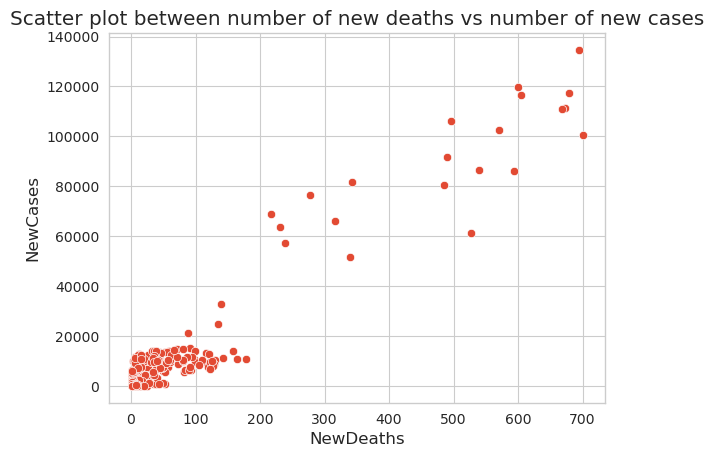

In [215]:
sns.scatterplot(data=visual_df, x='NewDeaths', y='NewCases')
plt.title("Scatter plot between number of new deaths vs number of new cases")
plt.show()

We have to do some data transforming!

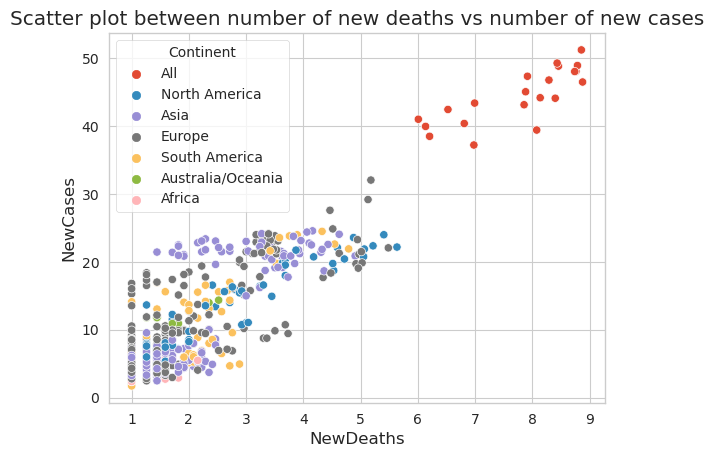

In [216]:
sns.scatterplot(x=big_df.NewDeaths**(1/3), y=visual_df.NewCases**(1/3), hue=visual_df.Continent)
plt.title("Scatter plot between number of new deaths vs number of new cases")
plt.show()

Maybe there is no relationship between `NewDeaths` and `NewCases` when most points cluster near the origin.

#### `NewCases` vs `NewRecovered`

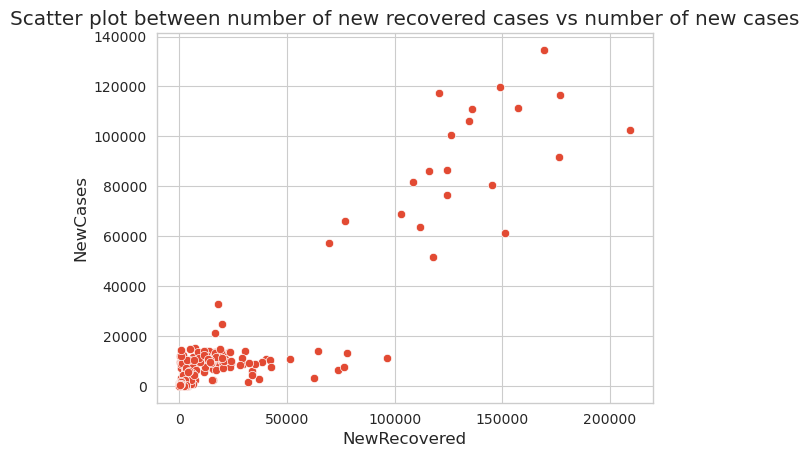

In [217]:
sns.scatterplot(x=(visual_df.NewRecovered), y=(visual_df.NewCases))
plt.title("Scatter plot between number of new recovered cases vs number of new cases")
plt.show()

Similarly, we also have to do some data transforming!

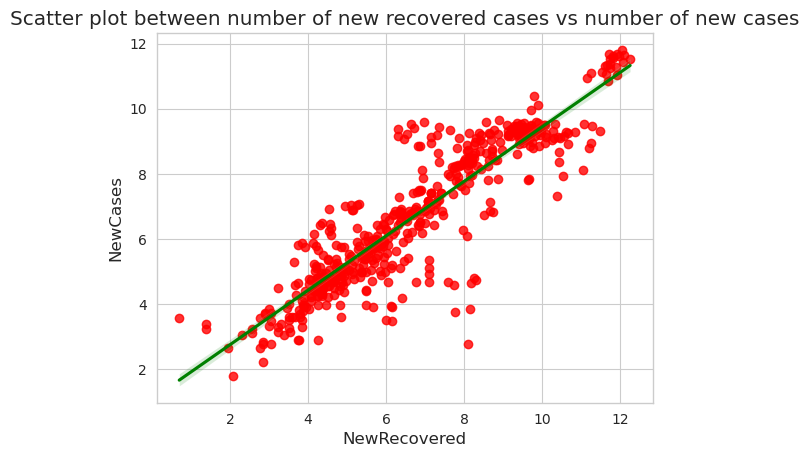

In [218]:
sns.regplot(x=np.log1p(visual_df.NewRecovered), y=np.log1p(visual_df.NewCases),
            scatter_kws={"color": "red"}, line_kws={"color": "green"})
plt.title("Scatter plot between number of new recovered cases vs number of new cases")
plt.show()

Unlike `NewDeaths`, there is a strong linear relationship between `NewCases` and `NewRecovered`.

### **VIET NAM**

#### **In order to understand the situation of Corona epidemic in Vietnam, the extent of the epidemic compared to the world and other countries. We perform some analysis and visualization based on available data.**

#### Total Cases in Viet Nam and two most cases countries USA and India with the others

In [219]:
# total number of infections in the world
total_world_cases = big_df[big_df['Date'] == '2023-03-15']['TotalCases'].sum()
total_world_cases

1363912401

In [220]:
# total number of confirmed infections in Viet Nam 
vn_confirmed = big_df[big_df['Country,Other']=='Vietnam']['TotalCases']
vn_confirmed = vn_confirmed[big_df['Date'] == '2023-03-15']
vn_confirmed

738    11527079
Name: TotalCases, dtype: int64

In [221]:
# total number of confirmed infections in other contries outside VN 
outside_vn_confirmed = total_world_cases - vn_confirmed
outside_vn_confirmed

738    1352385322
Name: TotalCases, dtype: int64

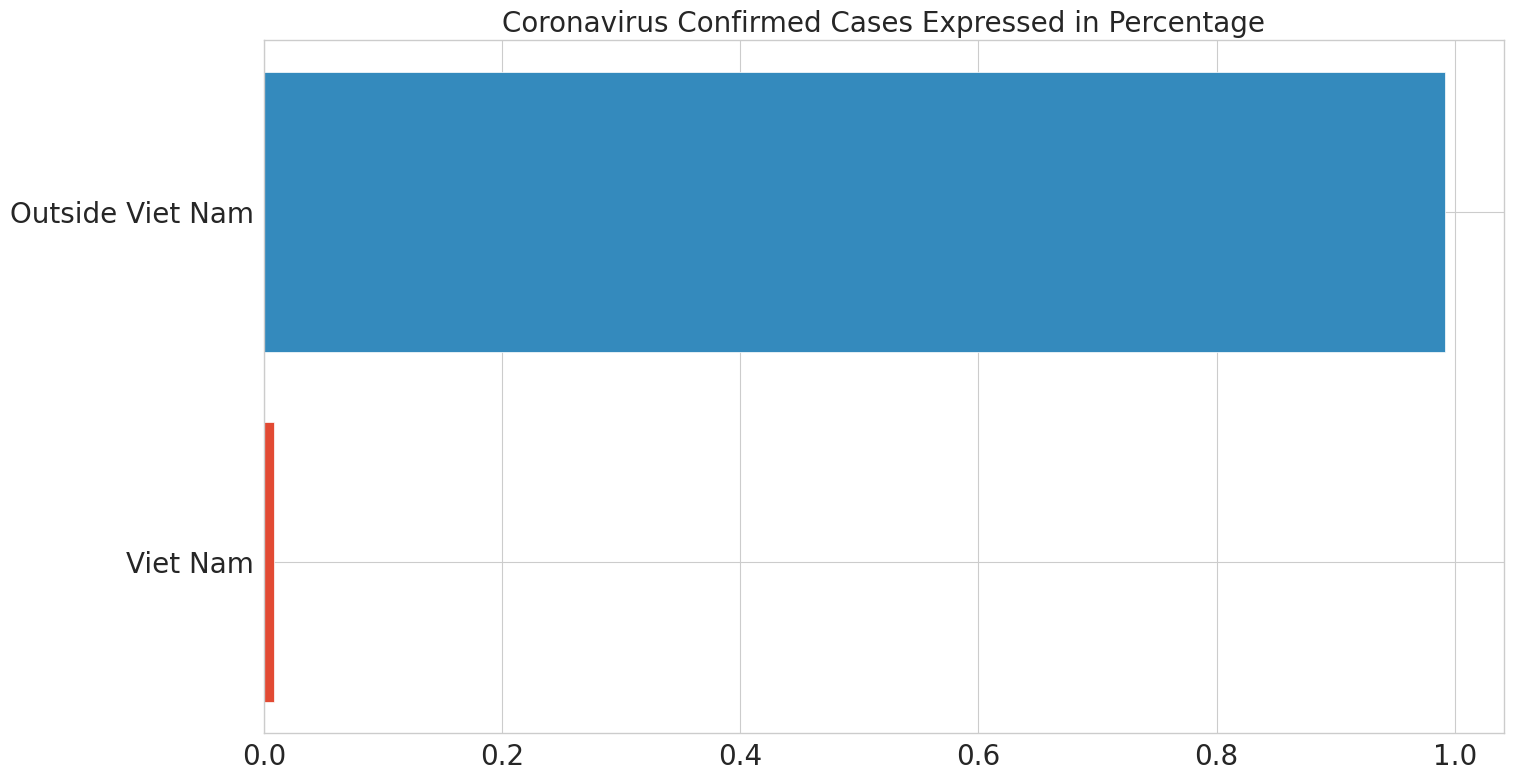

In [222]:
# bar chart to compare the number of infections in Vietnam with countries outside Vietnam by percent 
plt.figure(figsize=(16, 9))
plt.barh('Viet Nam', vn_confirmed/total_world_cases)
plt.barh('Outside Viet Nam', outside_vn_confirmed/total_world_cases)
plt.title('Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [223]:
# USA
us_confirmed = big_df[big_df['Country,Other']=='USA']['TotalCases']
us_confirmed = us_confirmed[big_df['Date'] == '2023-03-15']
us_confirmed

726    105735659
Name: TotalCases, dtype: int64

In [224]:
outside_us_confirmed = total_world_cases - us_confirmed
outside_us_confirmed

726    1258176742
Name: TotalCases, dtype: int64

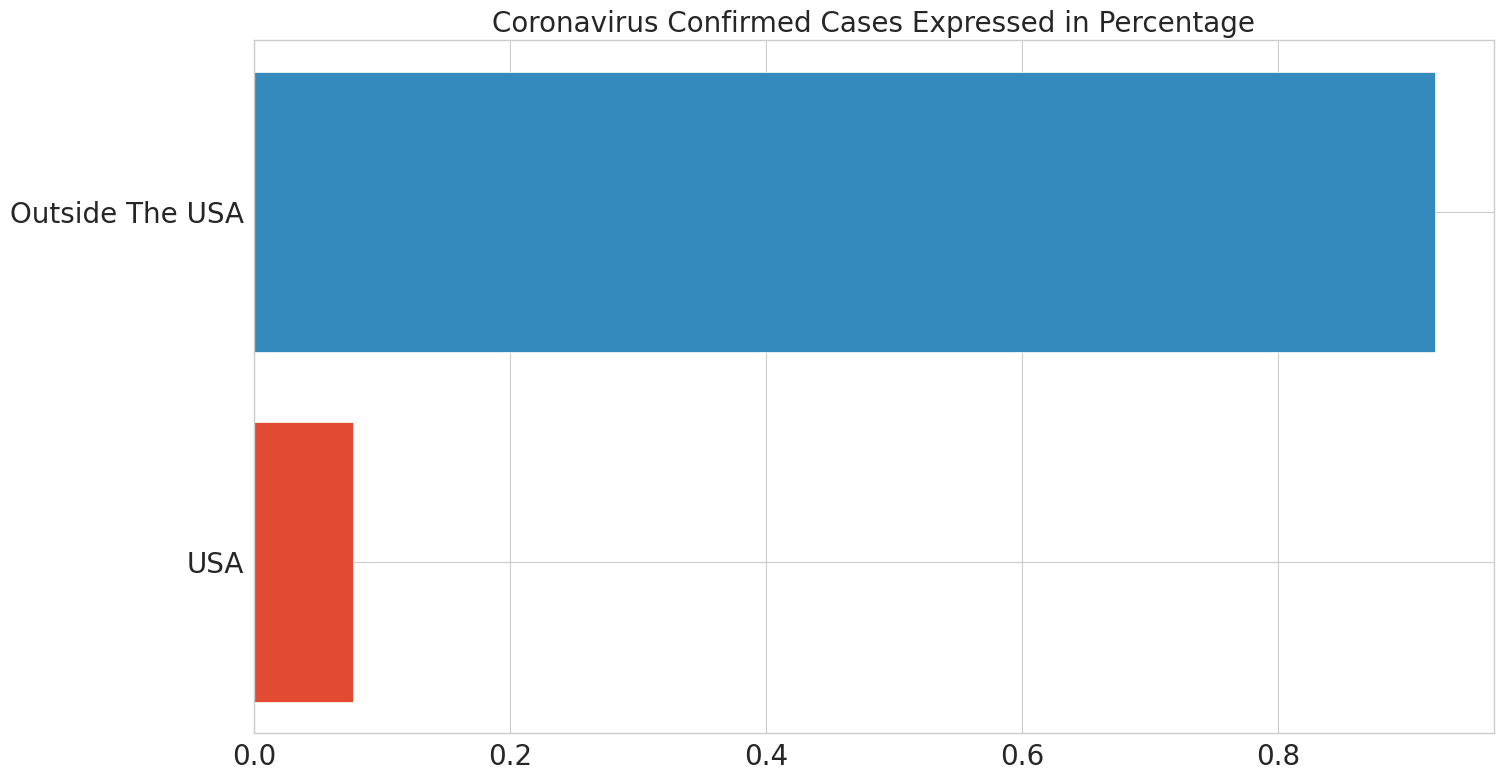

In [225]:
# bar chart to compare the number of infections in US with countries outside the USA by percent 
plt.figure(figsize=(16, 9))
plt.barh('USA', us_confirmed/total_world_cases)
plt.barh('Outside The USA', outside_us_confirmed/total_world_cases)
plt.title('Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [226]:
# India 
ind_confirmed = big_df[big_df['Country,Other']=='India']['TotalCases']
ind_confirmed = ind_confirmed[big_df['Date'] == '2023-03-15']
ind_confirmed

727    44691956
Name: TotalCases, dtype: int64

In [227]:
outside_ind_confirmed = total_world_cases - ind_confirmed
outside_ind_confirmed

727    1319220445
Name: TotalCases, dtype: int64

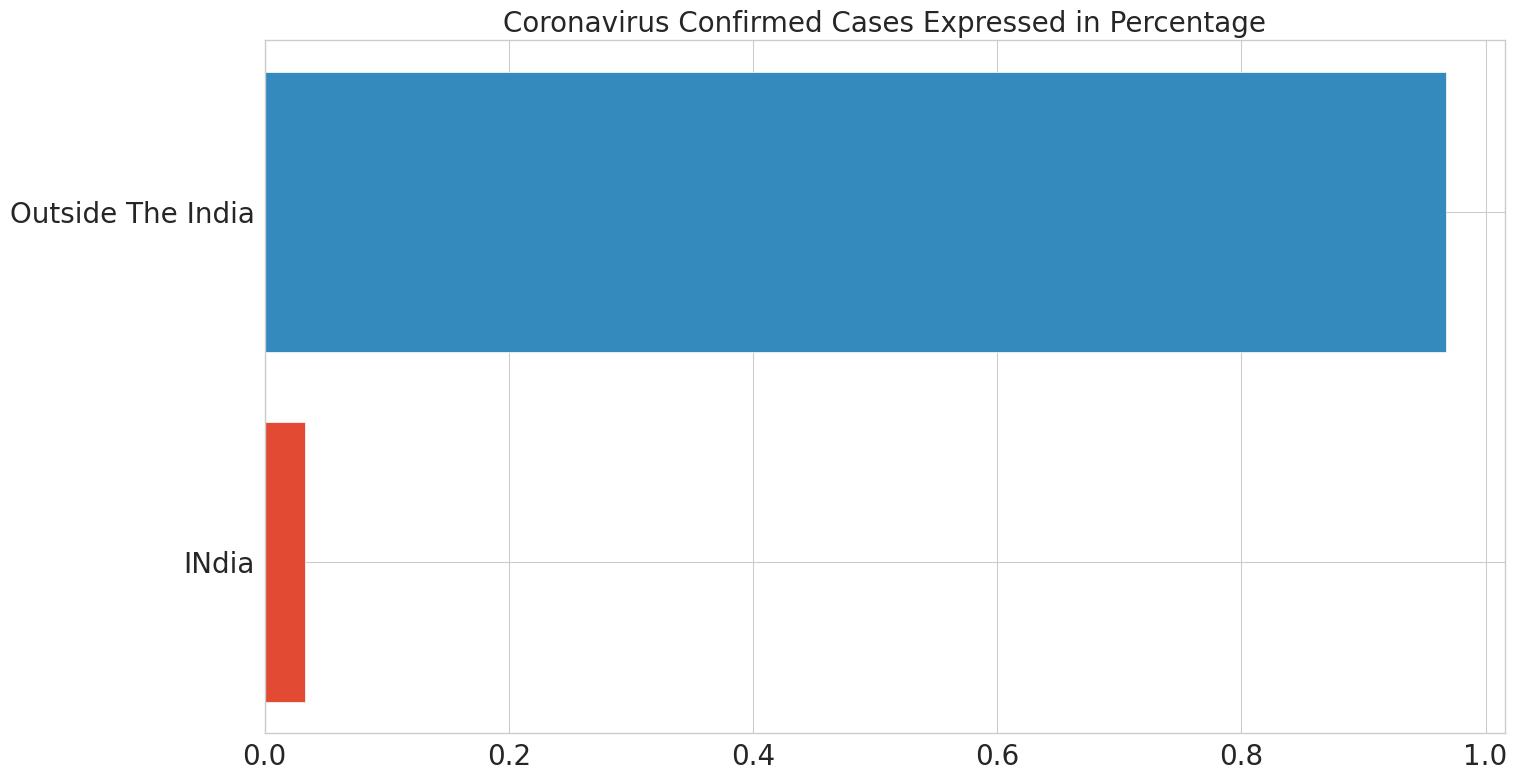

In [228]:
# bar chart to compare the number of infections in India with countries outside India by percent 
plt.figure(figsize=(16, 9))
plt.barh('INdia', ind_confirmed/total_world_cases)
plt.barh('Outside The India', outside_ind_confirmed/total_world_cases)
plt.title('Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

* Based on the chart, it can be seen that Vietnam has a small infection rate compared to the world, not equal to countries with large outbreaks such as the US or India. That is partly because Vietnam has controlled the disease quite well and the population is not large proportion to the world population.

#### Show the new cases and new recovered

In [229]:
# new data frame of VN to show two attributes new cases and new recovered each day
new_df = big_df.loc[big_df['Country,Other'] == 'Vietnam', ['NewCases','NewRecovered', 'Date']]
new_df.set_index('Date', inplace = True)
new_df

,NewCases,NewRecovered
Date,,
2023-03-11,7,2.0
2023-03-16,20,6.0
2023-03-12,4,1.0
2023-03-15,25,6.0
2023-03-08,8,5.0
2023-02-27,4,3.0
2023-03-17,11,6.0
2023-03-14,8,4.0
2023-02-25,10,4.0


(array([19413., 19417., 19421., 19425., 19429., 19433.]),
 [Text(19413.0, 0, '2023-02-25'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19421.0, 0, '2023-03-05'),
  Text(19425.0, 0, '2023-03-09'),
  Text(19429.0, 0, '2023-03-13'),
  Text(19433.0, 0, '2023-03-17')])

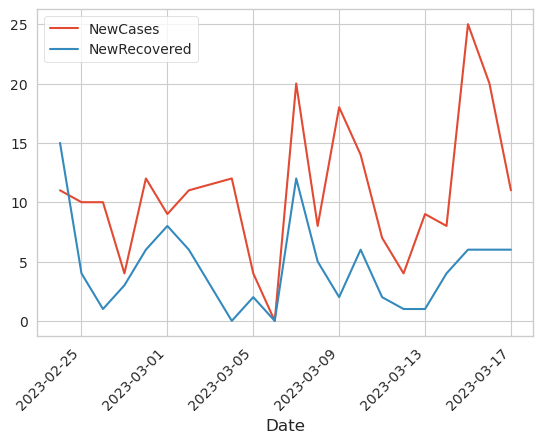

In [230]:
# using line plot to show the growth of new cases and new recovered 
new_df.plot.line()
plt.xticks(rotation=45)

* The occurrence of new infections is very small (the most recent days are 25 cases a day), besides the recovery is also very fast, the number of recovered cases is quite similar to new infections.

#### Show the new deaths and new cases

In [231]:
# new data frame of VN to show two attributes new cases and new deaths each day
vn = big_df.loc[big_df['Country,Other'] == 'Vietnam',
                    ['NewDeaths','NewCases','Date']]
vn

,NewDeaths,NewCases,Date
21,0.0,7,2023-03-11
260,0.0,20,2023-03-16
499,0.0,4,2023-03-12
738,0.0,25,2023-03-15
977,0.0,8,2023-03-08
1216,0.0,4,2023-02-27
1455,0.0,11,2023-03-17
1694,0.0,8,2023-03-14
1933,0.0,10,2023-02-25
2172,0.0,9,2023-03-01


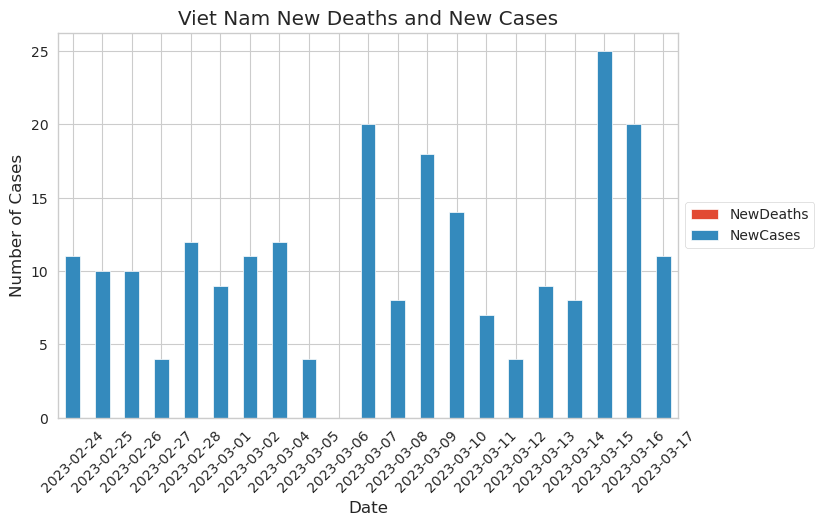

In [232]:
# plot bar chart to show the growth of new deaths and compare with new cases
vn.Date = vn.Date.dt.date
ax = vn.sort_values(by='Date',ascending=True).plot.bar(x = 'Date', figsize=(8,5), stacked=True,title='Viet Nam New Deaths and New Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.tick_params(axis='x', labelrotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

* Based on this chart, we can see new cases are insignificant and no deaths have been recorded, proving that the epidemic in Vietnam is not bad and has been controlled.

#### Compare the ratio of total cases with total recoveries and total deaths

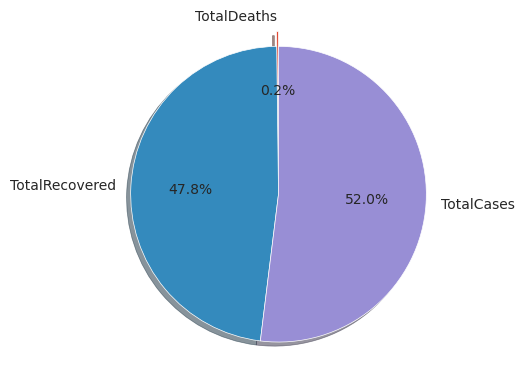

In [233]:
fig = plt.figure()
ax = fig.add_subplot()
vn_total = big_df[big_df['Country,Other'] == 'Vietnam'].describe().loc['mean',['TotalDeaths','TotalRecovered','TotalCases']]
ax.pie(vn_total.values, labels=vn_total.index, autopct='%1.1f%%', explode = (0.1, 0, 0), shadow=True, startangle=90)
plt.show()

* Based on the chart, the proportion of TotalCases and TotalRecovered in Viet Nam is not much difference and go to equilibrium. It means that people who suffered Corona Virus in Viet Nam is recovered almost completely now.

* The death rate is very low with only 0.2 percent, which shows that the ability to recover in Viet Nam is highly.

#### Shows the number of new cases with severe cases

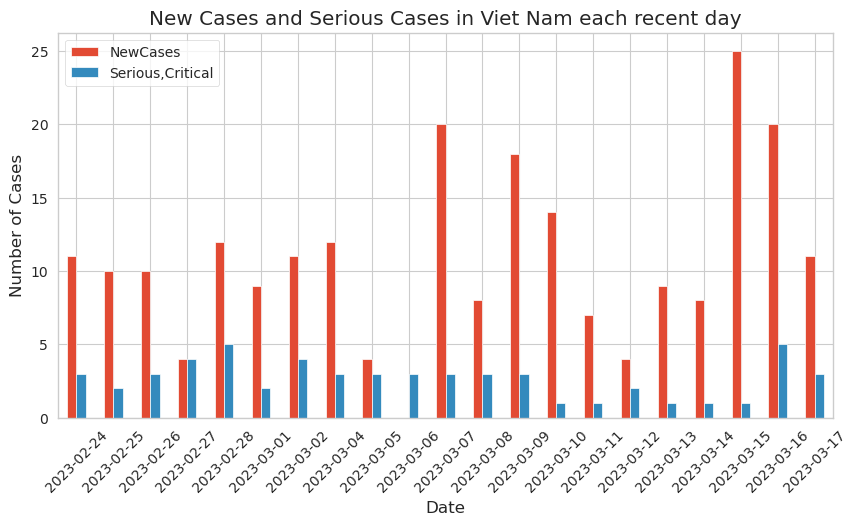

In [234]:
vn_df = big_df.loc[big_df['Country,Other'] == 'Vietnam', ['NewCases','Serious,Critical','Date']]
vn_df = vn_df.set_index('Date').sort_index()
vn_df.index = vn_df.index.date

ax = vn_df.plot(kind='bar',figsize=(10,5), title = 'New Cases and Serious Cases in Viet Nam each recent day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45);

* Very few serious cases, the highest is 5, that proves that currently the covid disease in Vietnam is still ongoing but not serious.

---
# References: 

https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html

https://pandas.pydata.org/docs/reference/api/

https://geopandas.org/en/stable/getting_started/introduction.html

https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/

https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
